# (tweet_Fraud_actions Data Exploration)
## by (Hanan Ali)

## Preliminary Wrangling

> In This document I'm exploring tweets dataset dealing trying to figure out some abnormalities in actions of the accounts according to time of creation and time of tweeting.

In [6]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sb
import os
import matplotlib.dates as mdates
import seaborn as snb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
tweet1 = pd.read_csv("data/tweets_2020_lite.csv")
tweet1.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at
0,1214659714698633223,2020-01-07 21:26:57+00:00,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29+00:00
1,1214658467836956673,2020-01-07 21:22:00+00:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25+00:00
2,1214657580837953536,2020-01-07 21:18:29+00:00,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22+00:00
3,1214654926342758400,2020-01-07 21:07:56+00:00,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04+00:00
4,1214649017851957249,2020-01-07 20:44:27+00:00,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09+00:00


In [6]:
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612583 entries, 0 to 612582
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_str            612583 non-null  int64 
 1   created_at        612583 non-null  object
 2   full_text         612583 non-null  object
 3   user.id_str       612583 non-null  int64 
 4   user.screen_name  612583 non-null  object
 5   user.name         612541 non-null  object
 6   user.created_at   612583 non-null  object
dtypes: int64(2), object(5)
memory usage: 32.7+ MB


## Data Wrangling

> Preparing the time diff. and days diff between usr created and tweet 


In [7]:
tweet1["user.created_at"] = tweet1["user.created_at"].astype(str).str.split("+").str[0]
tweet1["created_at"] = tweet1["created_at"].astype(str).str.split("+").str[0]

In [8]:
my_format = '%Y-%m-%d %H:%M:%S'
tweet1['user.created_at'] = pd.to_datetime(tweet1['user.created_at'], format=my_format)
tweet1['created_at'] = pd.to_datetime(tweet1['created_at'], format=my_format)

In [9]:
tweet1['diff'] = abs(tweet1['user.created_at'] - tweet1['created_at'])
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,diff
0,1214659714698633223,2020-01-07 21:26:57,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29,1609 days 17:32:28
1,1214658467836956673,2020-01-07 21:22:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25,281 days 04:43:35
2,1214657580837953536,2020-01-07 21:18:29,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22,3555 days 15:56:07
3,1214654926342758400,2020-01-07 21:07:56,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04,2257 days 22:07:52
4,1214649017851957249,2020-01-07 20:44:27,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09,2674 days 22:46:18
...,...,...,...,...,...,...,...,...
612578,1335460896550789121,2020-12-06 05:47:44,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,2020-05-30 12:47:40,189 days 17:00:04
612579,1335460475996237824,2020-12-06 05:46:03,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,2020-08-19 03:27:02,109 days 02:19:01
612580,1335460343460540417,2020-12-06 05:45:32,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,2020-10-07 16:33:47,59 days 13:11:45
612581,1335459902752317442,2020-12-06 05:43:47,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2014-12-10 12:17:42,2187 days 17:26:05


In [10]:
tweet1["days"] = tweet1["diff"].astype(str).str.split(" ").str[0]
tweet1["hours"] = tweet1["diff"].astype(str).str.split(" ").str[2]
tweet1.drop(['diff'], axis=1, inplace=True)

In [11]:
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,days,hours
0,1214659714698633223,2020-01-07 21:26:57,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29,1609,17:32:28
1,1214658467836956673,2020-01-07 21:22:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25,281,04:43:35
2,1214657580837953536,2020-01-07 21:18:29,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22,3555,15:56:07
3,1214654926342758400,2020-01-07 21:07:56,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04,2257,22:07:52
4,1214649017851957249,2020-01-07 20:44:27,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09,2674,22:46:18
...,...,...,...,...,...,...,...,...,...
612578,1335460896550789121,2020-12-06 05:47:44,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,2020-05-30 12:47:40,189,17:00:04
612579,1335460475996237824,2020-12-06 05:46:03,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,2020-08-19 03:27:02,109,02:19:01
612580,1335460343460540417,2020-12-06 05:45:32,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,2020-10-07 16:33:47,59,13:11:45
612581,1335459902752317442,2020-12-06 05:43:47,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2014-12-10 12:17:42,2187,17:26:05


In [12]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(tweet1)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,days,hours,tweet_date,tweet_time,user_create_date,user_create_time
0,1214659714698633223,2020-01-07 21:26:57,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29,1609,17:32:28,2020-01-07,21:26:57,2015-08-12,03:54:29
1,1214658467836956673,2020-01-07 21:22:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25,281,04:43:35,2020-01-07,21:22:00,2019-04-01,16:38:25
2,1214657580837953536,2020-01-07 21:18:29,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22,3555,15:56:07,2020-01-07,21:18:29,2010-04-14,05:22:22
3,1214654926342758400,2020-01-07 21:07:56,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04,2257,22:07:52,2020-01-07,21:07:56,2013-11-01,23:00:04
4,1214649017851957249,2020-01-07 20:44:27,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09,2674,22:46:18,2020-01-07,20:44:27,2012-09-10,21:58:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,1335460896550789121,2020-12-06 05:47:44,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,2020-05-30 12:47:40,189,17:00:04,2020-12-06,05:47:44,2020-05-30,12:47:40
612579,1335460475996237824,2020-12-06 05:46:03,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,2020-08-19 03:27:02,109,02:19:01,2020-12-06,05:46:03,2020-08-19,03:27:02
612580,1335460343460540417,2020-12-06 05:45:32,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,2020-10-07 16:33:47,59,13:11:45,2020-12-06,05:45:32,2020-10-07,16:33:47
612581,1335459902752317442,2020-12-06 05:43:47,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2014-12-10 12:17:42,2187,17:26:05,2020-12-06,05:43:47,2014-12-10,12:17:42


In [13]:
drop_list = ['user.created_at','created_at']
def y_m_d(df):
    df['tweet_date'] = pd.to_datetime(df['tweet_date'])
    df['tweet_year'] = (df.tweet_date.dt.strftime('%Y')).astype('int')
#     df['tweet_day'] = df.tweet_date.dt.strftime('%A')
    df['tweet_month'] = df.tweet_date.dt.strftime('%B')
    
    df['user_create_date'] = pd.to_datetime(df['user_create_date'])
    df['usr_year'] = (df.user_create_date.dt.strftime('%Y')).astype('int')
#     df['usr_day'] = df.user_create_date.dt.strftime('%A')
    df['usr_month'] = df.user_create_date.dt.strftime('%B')
    
    df.drop(drop_list, axis=1, inplace=True)
    return df
y_m_d(tweet1)

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1214659714698633223,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,1609,17:32:28,2020-01-07,21:26:57,2015-08-12,03:54:29,2020,January,2015,August
1,1214658467836956673,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,281,04:43:35,2020-01-07,21:22:00,2019-04-01,16:38:25,2020,January,2019,April
2,1214657580837953536,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,3555,15:56:07,2020-01-07,21:18:29,2010-04-14,05:22:22,2020,January,2010,April
3,1214654926342758400,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2257,22:07:52,2020-01-07,21:07:56,2013-11-01,23:00:04,2020,January,2013,November
4,1214649017851957249,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2674,22:46:18,2020-01-07,20:44:27,2012-09-10,21:58:09,2020,January,2012,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,1335460896550789121,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,189,17:00:04,2020-12-06,05:47:44,2020-05-30,12:47:40,2020,December,2020,May
612579,1335460475996237824,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,109,02:19:01,2020-12-06,05:46:03,2020-08-19,03:27:02,2020,December,2020,August
612580,1335460343460540417,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,59,13:11:45,2020-12-06,05:45:32,2020-10-07,16:33:47,2020,December,2020,October
612581,1335459902752317442,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2187,17:26:05,2020-12-06,05:43:47,2014-12-10,12:17:42,2020,December,2014,December


In [14]:
sorted_fresh_usr = tweet1.sort_values(["days"], ascending=True)
sorted_fresh_usr.head()

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
196257,1281408241390559232,"""The Media Deception Of Amber Heard &amp; #MeT...",1281358767947489282,WanderlustBuzz_,Wanderlust Buzz 🐝,0,03:16:21,2020-07-10,02:01:46,2020-07-09,22:45:25,2020,July,2020,July
33574,1224006472431833088,Click &amp; Learn\nhttps://t.co/VpBIW3PPod\n\n...,1223826099873947648,Tryallthings1,cristina,0,11:56:35,2020-02-02,16:27:38,2020-02-02,04:31:03,2020,February,2020,February
342749,1326578825992544256,#JusticeForJohnnyDepp Почему нельзя было досня...,1326376225112289283,Maria10953362,Maria,0,13:24:36,2020-11-11,17:33:33,2020-11-11,04:08:57,2020,November,2020,November
104269,1225374861494632449,คอลลาเจนยี่ห้อไหนดีคุณผู้หญิงทั้งหลายควรรู้\nh...,1225343194918899712,PeeradaPhungnoy,Peerada Phungnoy,0,02:05:42,2020-02-06,11:05:08,2020-02-06,08:59:26,2020,February,2020,February
405418,1329825151358291968,#justiceforjohnnydepp @TheNamesQ Is there any ...,1329561626895405056,Mewmewjusticef1,Mewmew#JusticeForJohnnyDepp#Justice4JenHowell,0,17:26:53,2020-11-20,16:33:17,2020-11-19,23:06:24,2020,November,2020,November


In [15]:
sorted_fresh_usr.to_csv('tweet_diff.csv', index=False)

In [16]:
sorted_usr_year = tweet1.sort_values(["usr_year"], ascending=False)
sorted_usr_year

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
586306,1337289607529041923,#JusticeForJohnnyDepp https://t.co/6SF2RAECvj ...,1329561626895405056,Mewmewjusticef1,Mewmew#JusticeForJohnnyDepp#Justice4JenHowell,21,07:47:58,2020-12-11,06:54:22,2020-11-19,23:06:24,2020,December,2020,November
156648,1270937094777565184,@Loreal Fire Amber Heard!,1229637622756077568,CoreyDa68268616,Corey Davis,113,23:09:08,2020-06-11,04:33:10,2020-02-18,05:24:02,2020,June,2020,February
369109,1324759803428823044,#JusticeForJohnnyDepp,1282345556338188288,chezmomo2,chezmomo2,117,00:58:51,2020-11-06,17:05:24,2020-07-12,16:06:33,2020,November,2020,July
156652,1270927675956187137,Warner Bros responded to JK rowling about her ...,1259964873246531585,JusticeSquad2,Justice4ALL,30,06:02:09,2020-06-11,03:55:45,2020-05-11,21:53:36,2020,June,2020,May
369108,1324759806004088832,Copy paste the following hashtags and use them...,1287016879178092544,j_ar_of_d_irt,Bᴶᴰ,104,03:36:47,2020-11-06,17:05:25,2020-07-25,13:28:38,2020,November,2020,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604797,1334451483438424065,#JusticeForJohnnyDepp https://t.co/FW0Cb3pCKE ...,9292,nicabar,Doug Brown,5160,11:10:17,2020-12-03,10:56:41,2006-10-17,23:46:24,2020,December,2006,October
39312,1224087927564705794,It is possible for men to be victims of intima...,13696,TaePhoenix,Tae Phoenix,4820,22:41:31,2020-02-02,21:51:19,2006-11-21,23:09:48,2020,February,2006,November
23151,1224610370238570497,Johnny Depp: *dinas ke luar kota*\nAmber Heard...,242663,ybsmee,ybs | 马可斯,4788,18:27:21,2020-02-04,08:27:19,2006-12-25,13:59:58,2020,February,2006,December
178635,1285635786151534599,In my daily @guardian reading I’ve seen a sing...,12552,philgyford,Phil Gyford,4997,01:04:33,2020-07-21,18:00:32,2006-11-15,16:55:59,2020,July,2006,November


> Saved the sorted_fresh_usr in a csv file to countinue processing

In [3]:
tweet_df = pd.read_csv("tweet_diff.csv")
tweet_df

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1281408241390559232,"""The Media Deception Of Amber Heard &amp; #MeT...",1281358767947489282,WanderlustBuzz_,Wanderlust Buzz 🐝,0,03:16:21,2020-07-10,02:01:46,2020-07-09,22:45:25,2020,July,2020,July
1,1224006472431833088,Click &amp; Learn\nhttps://t.co/VpBIW3PPod\n\n...,1223826099873947648,Tryallthings1,cristina,0,11:56:35,2020-02-02,16:27:38,2020-02-02,04:31:03,2020,February,2020,February
2,1326578825992544256,#JusticeForJohnnyDepp Почему нельзя было досня...,1326376225112289283,Maria10953362,Maria,0,13:24:36,2020-11-11,17:33:33,2020-11-11,04:08:57,2020,November,2020,November
3,1225374861494632449,คอลลาเจนยี่ห้อไหนดีคุณผู้หญิงทั้งหลายควรรู้\nh...,1225343194918899712,PeeradaPhungnoy,Peerada Phungnoy,0,02:05:42,2020-02-06,11:05:08,2020-02-06,08:59:26,2020,February,2020,February
4,1329825151358291968,#justiceforjohnnydepp @TheNamesQ Is there any ...,1329561626895405056,Mewmewjusticef1,Mewmew#JusticeForJohnnyDepp#Justice4JenHowell,0,17:26:53,2020-11-20,16:33:17,2020-11-19,23:06:24,2020,November,2020,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,1339334417546940416,🏴‍☠️ #JusticeForJohnnyDepp https://t.co/vm4h3q...,977244583993184256,JamienColton,Colton J. Andersson🏴‍☠️,999,04:15:44,2020-12-16,22:19:43,2018-03-23,18:03:59,2020,December,2018,March
612579,1289986744012533760,Remove Amber Heard from Aquaman 2\n\n472.726 p...,927931535541587968,deppbrazilfc,Johnny Depp BR 🇧🇷,999,01:58:09,2020-08-02,18:09:41,2017-11-07,16:11:32,2020,August,2017,November
612580,1247949777968431104,"@sue_markaryan I didn't think it was possible,...",885907189759709184,faylovesflowers,AngieF,999,01:07:59,2020-04-08,18:09:47,2017-07-14,17:01:48,2020,April,2017,July
612581,1327639368182476804,DC Entertainment: Remove Amber Heard from Aqua...,965273280868478976,jyrojastorre29,garver reds vlz,999,22:33:28,2020-11-14,15:47:46,2018-02-18,17:14:18,2020,November,2018,February


In [4]:
tweet_df['user.id_str'] = tweet_df['user.id_str'].astype(str)

In [19]:
all_users_tweeted = tweet_df['user.id_str'].nunique()
print('no. of unique users in the dataset is:',all_users_tweeted)

no. of unique users in the dataset is: 196251


In [20]:
tweet_df[tweet_df.tweet_month == 'January'].shape[0]

3709

In [21]:
x = tweet_df[tweet_df['usr_year']== 2020]
print('no. of tweets from users created in 2020 are...',x.shape[0])

y = tweet_df[tweet_df['usr_year']!= 2020]
print('no. of tweets from users created in rest years are...',y.shape[0])

z = tweet_df[tweet_df['days'] <= 1]
print('no. of tweets in the same day of usr creation in 2020 are...',z.shape[0])

no. of tweets from users created in 2020 are... 132711
no. of tweets from users created in rest years are... 479872
no. of tweets in the same day of usr creation in 2020 are... 5439


In [22]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612583 entries, 0 to 612582
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_str            612583 non-null  int64 
 1   full_text         612583 non-null  object
 2   user.id_str       612583 non-null  object
 3   user.screen_name  612583 non-null  object
 4   user.name         612541 non-null  object
 5   days              612583 non-null  int64 
 6   hours             612583 non-null  object
 7   tweet_date        612583 non-null  object
 8   tweet_time        612583 non-null  object
 9   user_create_date  612583 non-null  object
 10  user_create_time  612583 non-null  object
 11  tweet_year        612583 non-null  int64 
 12  tweet_month       612583 non-null  object
 13  usr_year          612583 non-null  int64 
 14  usr_month         612583 non-null  object
dtypes: int64(4), object(11)
memory usage: 70.1+ MB


In [23]:
print('proportion of tweets from users created in 2020 is {}%'.format((tweet_df['usr_year'] == 2020).mean()*100))

proportion of tweets from users created in 2020 is 21.66416632521634%


In [24]:
prob_same_day = (tweet_df[tweet_df.days <= 1].shape[0]/ tweet_df[tweet_df.usr_year == 2020].shape[0])*100
prob_14_days = (tweet_df[tweet_df.days <= 14].shape[0]/ tweet_df[tweet_df.usr_year == 2020].shape[0])*100


print(' the probability of tweets in the same day for all 2020 users {}%'.format(prob_same_day))
print(' the probability of tweets within 14 days only for all 2020 users {}%'.format(prob_14_days))

 the probability of tweets in the same day for all 2020 users 4.098379184845266%
 the probability of tweets within 14 days only for all 2020 users 16.221714854081426%


## Exploring some features

> after calculation of the days diff between the created usr and tweet in 2020 i found that

In [25]:
fresh_users_2020 = tweet_df.groupby(['user.id_str','tweet_year','usr_year']).size().reset_index(name='user_id_count')
fresh_users_2020 = fresh_users_2020[fresh_users_2020['usr_year'] == 2020]
print('No. of users created in 2020 is: {}'.format(fresh_users_2020.shape[0]))
print('no. of proportion of users created in 2020 are :{}%'.format((fresh_users_2020.shape[0]/all_users_tweeted)*100))


No. of users created in 2020 is: 28391
no. of proportion of users created in 2020 are :14.466677876800627%


In [26]:
print('Saved that in a DF')
w = fresh_users_2020.sort_values(["user_id_count"], ascending=False)
w

Saved that in a DF


,user.id_str,tweet_year,usr_year,user_id_count
61064,1288453155290673153,2020,2020,1541
61533,1290638589806739456,2020,2020,1403
60589,1286399494175838209,2020,2020,1297
72031,1340150301899317248,2020,2020,1186
53147,1259964873246531585,2020,2020,1088
...,...,...,...,...
52546,1257728971829121025,2020,2020,1
52545,1257724742687170562,2020,2020,1
52544,1257724029697290240,2020,2020,1
52543,1257723860654288896,2020,2020,1


> Almost 28391 usrs created in 2020 (14.5% of total users tweeted in 2020)
> those fresh users tweeted (21.66416632521634%) from the whole tweets in 2020
> (4.098379184845266%) of them tweeted in the same day
> From a general view to the data when sorting them in descending order many have tweeted after creation of the new user within few minutes only!

In [27]:
print("estimation of no. of tweets from users created in all years")
o = tweet_df.groupby('usr_year').size().reset_index(name='year_count')
o

estimation of no. of tweets from users created in all years


,usr_year,year_count
0,2006,15
1,2007,2231
2,2008,5235
3,2009,51176
4,2010,33047
5,2011,48433
6,2012,37693
7,2013,31423
8,2014,30129
9,2015,42967


<Figure size 2880x3240 with 0 Axes>

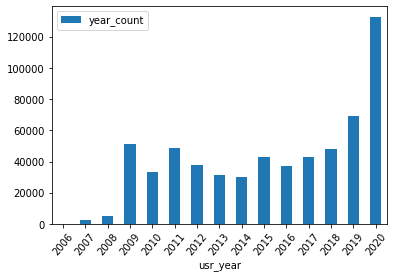

In [28]:
plt.figure(figsize=[40, 45]);
o.plot(x="usr_year", y="year_count", kind="bar", rot=50, fontsize=10);

> Very Obvious how tweets in users created in 2020 are signifcally higher than other years

In [29]:
print('Saved that in a DF')
users_tweeted_2020 = tweet_df.groupby(['user.id_str','tweet_year','usr_year', 'full_text','days', 'hours']).size().reset_index(name='user_id_count')
users_tweeted_2020 = users_tweeted_2020[users_tweeted_2020['usr_year'] == 2020]
users_tweeted_2020

Saved that in a DF


,user.id_str,tweet_year,usr_year,full_text,days,hours,user_id_count
113791,1212162735430987776,2020,2020,Johnny deep is innocent #JusticeForJohnnyDepp ...,311,12:52:47,1
113792,1212165917372628993,2020,2020,DC Entertainment: Remove Amber Heard from Aqua...,212,00:55:57,1
113793,1212169453690970112,2020,2020,amb*r he*rd is a manipulative narcissist and i...,202,09:27:30,1
113794,1212172765475688448,2020,2020,where's willy wonka?\nAH can suck it 🖕🖕🖕\n #Ju...,32,21:34:32,1
113795,1212172872048709632,2020,2020,I hate that as a society we are so often unwil...,31,23:40:04,1
...,...,...,...,...,...,...,...
254777,1344403314583216128,2020,2020,"#JusticeForJohnnyDepp\n\nGente, e o julgamento...",0,03:08:53,1
254778,1344403314583216128,2020,2020,"#JusticeForJohnnyDepp\n\ngente, eu sei que nes...",0,03:12:53,1
254779,1344431120558010371,2020,2020,#JusticeForJohnnyDepp,0,00:16:57,1
254782,1344477353561321474,2020,2020,DC Entertainment: Remove Amber Heard from Aqua...,0,00:15:55,1


In [30]:
users_tweeted_same_day = tweet_df.groupby(['user.id_str', 'days']).size().reset_index(name='user_id_count')
users_tweeted_same_day = users_tweeted_same_day[users_tweeted_same_day['days'] <=1]
users_tweeted_same_day = users_tweeted_same_day.sort_values(["days"], ascending=True)
print("Saved that in a DF")
users_tweeted_same_day

Saved that in a DF


,user.id_str,days,user_id_count
72032,1212775646604091393,0,2
132729,1324995604385304577,0,4
132725,1324994714580496385,0,1
132724,1324992719148756992,0,1
132723,1324992281758343168,0,1
...,...,...,...
96946,1260638881168396289,1,1
133032,1325119976320065540,1,1
96724,1260253321945849857,1,1
133231,1325338374857699328,1,1


In [31]:
tweets_day = tweet_df.groupby('tweet_date').size().reset_index(name='date_count')
tweets_day = tweets_day.sort_values(["date_count"], ascending=False)
print("Saved that in a DF")
tweets_day

Saved that in a DF


,tweet_date,date_count
32,2020-02-02,43799
310,2020-11-06,31143
311,2020-11-07,30142
306,2020-11-02,22145
312,2020-11-08,16153
...,...,...
28,2020-01-29,71
3,2020-01-04,71
27,2020-01-28,68
23,2020-01-24,66


In [32]:
tweets_day_list = set(list(tweets_day.tweet_date))
tweets_day_list

{'2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-

In [33]:
full_data_dates  = tweet_df[tweet_df['tweet_date'].isin(tweets_day_list)]
full_data_dates

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1281408241390559232,"""The Media Deception Of Amber Heard &amp; #MeT...",1281358767947489282,WanderlustBuzz_,Wanderlust Buzz 🐝,0,03:16:21,2020-07-10,02:01:46,2020-07-09,22:45:25,2020,July,2020,July
1,1224006472431833088,Click &amp; Learn\nhttps://t.co/VpBIW3PPod\n\n...,1223826099873947648,Tryallthings1,cristina,0,11:56:35,2020-02-02,16:27:38,2020-02-02,04:31:03,2020,February,2020,February
2,1326578825992544256,#JusticeForJohnnyDepp Почему нельзя было досня...,1326376225112289283,Maria10953362,Maria,0,13:24:36,2020-11-11,17:33:33,2020-11-11,04:08:57,2020,November,2020,November
3,1225374861494632449,คอลลาเจนยี่ห้อไหนดีคุณผู้หญิงทั้งหลายควรรู้\nh...,1225343194918899712,PeeradaPhungnoy,Peerada Phungnoy,0,02:05:42,2020-02-06,11:05:08,2020-02-06,08:59:26,2020,February,2020,February
4,1329825151358291968,#justiceforjohnnydepp @TheNamesQ Is there any ...,1329561626895405056,Mewmewjusticef1,Mewmew#JusticeForJohnnyDepp#Justice4JenHowell,0,17:26:53,2020-11-20,16:33:17,2020-11-19,23:06:24,2020,November,2020,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,1339334417546940416,🏴‍☠️ #JusticeForJohnnyDepp https://t.co/vm4h3q...,977244583993184256,JamienColton,Colton J. Andersson🏴‍☠️,999,04:15:44,2020-12-16,22:19:43,2018-03-23,18:03:59,2020,December,2018,March
612579,1289986744012533760,Remove Amber Heard from Aquaman 2\n\n472.726 p...,927931535541587968,deppbrazilfc,Johnny Depp BR 🇧🇷,999,01:58:09,2020-08-02,18:09:41,2017-11-07,16:11:32,2020,August,2017,November
612580,1247949777968431104,"@sue_markaryan I didn't think it was possible,...",885907189759709184,faylovesflowers,AngieF,999,01:07:59,2020-04-08,18:09:47,2017-07-14,17:01:48,2020,April,2017,July
612581,1327639368182476804,DC Entertainment: Remove Amber Heard from Aqua...,965273280868478976,jyrojastorre29,garver reds vlz,999,22:33:28,2020-11-14,15:47:46,2018-02-18,17:14:18,2020,November,2018,February


In [34]:
print('trendy dates')
trendy_dates = tweets_day[tweets_day.date_count >=10000]
trendy_dates

trendy dates


,tweet_date,date_count
32,2020-02-02,43799
310,2020-11-06,31143
311,2020-11-07,30142
306,2020-11-02,22145
312,2020-11-08,16153
313,2020-11-09,14601
315,2020-11-11,12426
316,2020-11-12,12353
314,2020-11-10,11142
33,2020-02-03,10467


<Figure size 2880x3240 with 0 Axes>

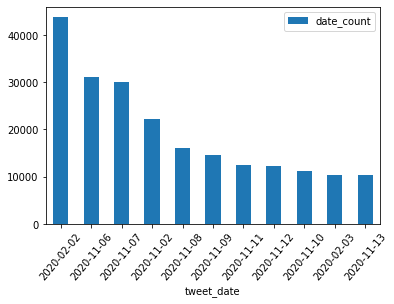

In [35]:
plt.figure(figsize=[40, 45]);
trendy_dates.plot(x="tweet_date", y="date_count", kind="bar", rot=50, fontsize=10);

In [36]:
trend_dates = set(list(trendy_dates.tweet_date))
trend_dates

{'2020-02-02',
 '2020-02-03',
 '2020-11-02',
 '2020-11-06',
 '2020-11-07',
 '2020-11-08',
 '2020-11-09',
 '2020-11-10',
 '2020-11-11',
 '2020-11-12',
 '2020-11-13'}

In [37]:
full_data_trendy_dates  = tweet_df[tweet_df['tweet_date'].isin(trend_dates)]
full_data_trendy_dates

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
1,1224006472431833088,Click &amp; Learn\nhttps://t.co/VpBIW3PPod\n\n...,1223826099873947648,Tryallthings1,cristina,0,11:56:35,2020-02-02,16:27:38,2020-02-02,04:31:03,2020,February,2020,February
2,1326578825992544256,#JusticeForJohnnyDepp Почему нельзя было досня...,1326376225112289283,Maria10953362,Maria,0,13:24:36,2020-11-11,17:33:33,2020-11-11,04:08:57,2020,November,2020,November
5,1223881275020402688,@realamberheard how about rights of men ? #Ju...,1223654247922749440,sayan_2309,SAYAN CHATTERJEE,0,15:01:54,2020-02-02,08:10:09,2020-02-01,17:08:15,2020,February,2020,February
6,1223785360712400896,Have a great day #JusticeForJohnnyDepp,1223783894899658752,Ghost7706142907,Ghost..77,0,00:05:05,2020-02-02,01:49:01,2020-02-02,01:43:56,2020,February,2020,February
7,1324823408882966533,@itsm_007 definitely\n#JohnnyDeppIsASurvivor #...,1324686761952501761,Imma_0509_,Imma,0,09:02:51,2020-11-06,21:18:09,2020-11-06,12:15:18,2020,November,2020,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612569,1223989175696809984,"Bro wtf, this bitch tried to kill Johnny Depp....",861847897352028160,nbjones522,Jones2022,999,07:40:09,2020-02-02,15:18:54,2017-05-09,07:38:45,2020,February,2017,May
612570,1325501114024857613,@LOrealUSA @Loreal @UNESCO @NobelPrize @4women...,963223416512962561,emilianevis,Emilia Helena Nevis 🌍🪐✨,999,16:42:13,2020-11-08,18:11:06,2018-02-13,01:28:53,2020,November,2018,February
612572,1323297061635301378,"I haven't went public about this, but this is ...",960954756880650241,SanjaCar2,Carica 10,999,20:58:57,2020-11-02,16:12:59,2018-02-06,19:14:02,2020,November,2018,February
612573,1325514629641101312,@aitanaheard Jajajaj!!!!! Leí lo que pusiste a...,963240720613216257,SenJu_Tobir4ma,Tobirama,999,16:27:11,2020-11-08,19:04:49,2018-02-13,02:37:38,2020,November,2018,February


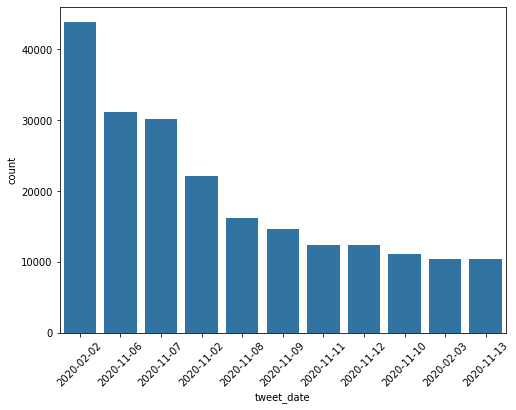

In [38]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = full_data_trendy_dates['tweet_date'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=full_data_trendy_dates, x='tweet_date', color=base_color, order=freq.index);
plt.xticks(rotation=45);

> Trendy date with highest tweets is 2/02/2020 and Nov. has trendy dates than others

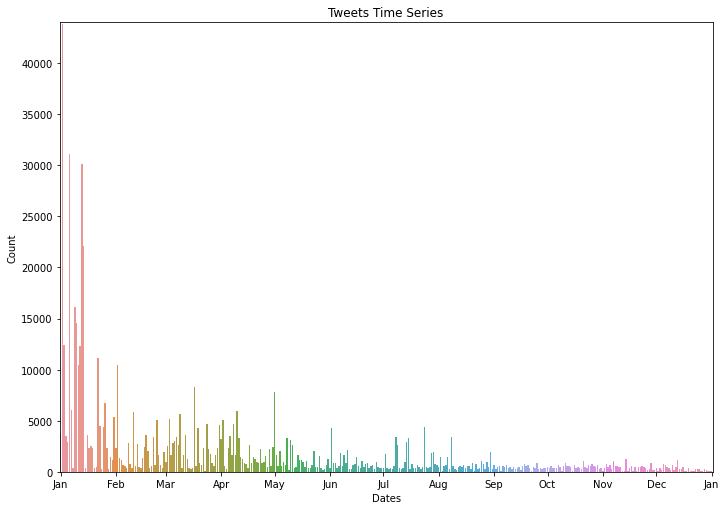

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'tweet_date', data = full_data_dates)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Dates')
plt.ylim(0,44000)
plt.ylabel('Count')
plt.title('Tweets Time Series')
plt.show()

> As we can see distribution of tweets is more in jan,feb, apr.,may., jul., and aug.

In [40]:
A = tweet_df[tweet_df['tweet_date']== '2020-02-02'].sort_values(["days"], ascending=True)
print("Saved that and for each trendy date in a DF")
A

Saved that and for each trendy date in a DF


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
1,1224006472431833088,Click &amp; Learn\nhttps://t.co/VpBIW3PPod\n\n...,1223826099873947648,Tryallthings1,cristina,0,11:56:35,2020-02-02,16:27:38,2020-02-02,04:31:03,2020,February,2020,February
2478,1224066830643281921,#AmberHeardIsAnAbuser\n#JusticeForJohnnyDepp\n...,1224011311480049665,Green46467900,Green,0,03:40:13,2020-02-02,20:27:29,2020-02-02,16:47:16,2020,February,2020,February
2458,1223762818819936258,"#JusticeForJohnnyDepp \n\nè meno frequente, ma...",1223555535112458240,Erika39637623,Erika,0,13:43:31,2020-02-02,00:19:27,2020-02-01,10:35:56,2020,February,2020,February
2446,1224067511555182592,#Fortnite #JusticeForJohnnyDepp #Concours,1223953433654448128,_MarketLockd,𝕰𝖛𝖊𝖗𝖞𝖙𝖍𝖎𝖓𝖌,0,07:33:12,2020-02-02,20:30:11,2020-02-02,12:56:59,2020,February,2020,February
2442,1223846217358155778,Amber Heard is the reason people don't believe...,1223825797292744704,itslahorebro,Shahzaib Metla,0,01:20:57,2020-02-02,05:50:50,2020-02-02,04:29:53,2020,February,2020,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502627,1223773119393030145,When you see #JusticeForJohnnyDepp trend and h...,755539,mannypdesign,ᴍᴀɴɴʏ ᴘᴇᴛᴇʀs ᴀʀᴛ + ᴅᴇsɪɢɴ 🖥🖌👕,4743,00:46:08,2020-02-02,01:00:22,2007-02-07,00:14:14,2020,February,2007,February
502658,1224078179616333825,Reading the recent news about Johnny Depp and ...,746703,Morteza,Morteza,4748,14:06:43,2020-02-02,21:12:34,2007-02-02,07:05:51,2020,February,2007,February
503605,1223836871828148225,"Yeah, I actually didn't think he was the abuse...",69053,Aine,Prolly A Veteran 🌻🍀,4797,05:32:26,2020-02-02,05:13:42,2006-12-14,23:41:16,2020,February,2006,December
504457,1223775917912145920,The Amber Heard news doesn't justify bringing ...,49443,bietz,mike b.,4803,22:00:26,2020-02-02,01:11:30,2006-12-08,03:11:04,2020,February,2006,December


In [41]:
freq_usrs = tweet_df.groupby('user.id_str').size().reset_index(name='id_count')
freq_usrs = freq_usrs[freq_usrs["id_count"] > 1]
freq_usrs = freq_usrs.sort_values(["id_count"], ascending=False)
print("Saved that in a DF")
# freq_usrs.to_csv('top_usrs_2020/users_id_freq_2020.csv', index=False)

Saved that in a DF


In [42]:
t = pd.read_csv('top_usrs_2020/users_id_freq_2020.csv')
# t['usr_year'].value_counts()
t

,user.id_str,id_count
0,4583281223,6072
1,276394494,4023
2,4194755003,3668
3,987240830351151104,2654
4,305700310,2165
...,...,...
48417,2970367356,2
48418,2970364678,2
48419,2969838366,2
48420,2969759145,2


## let's check the distribution for different features to visualize them correctly

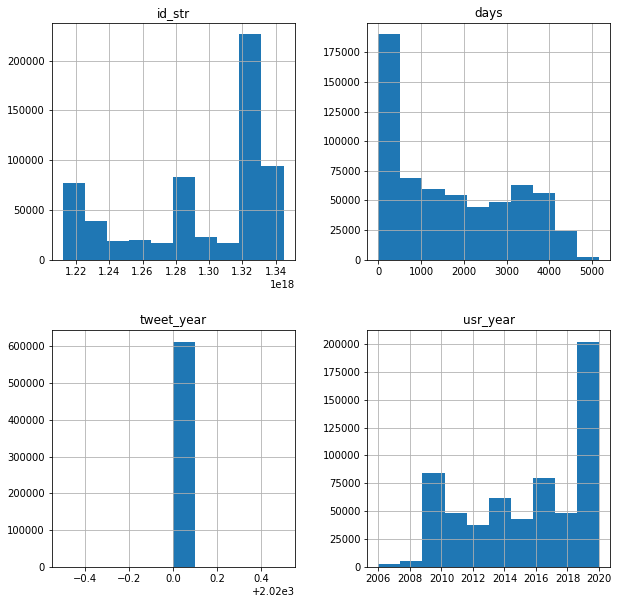

In [43]:
tweet_df.hist(figsize=(10,10));

## checking the distribution of the days

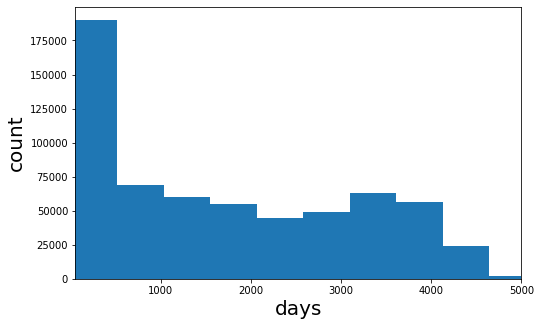

In [44]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'days')
plt.xlabel('days', fontsize=20)
plt.xlim(50,5000)
plt.ylabel('count', fontsize=20)
plt.show();

> users tweeted in less than 24 hours after creation showing ubnormal count!

## usr creation counts in various years

In [45]:
tweet_df.usr_year.value_counts()

2020    132711
2019     69477
2009     51176
2011     48433
2018     48023
2015     42967
2017     42600
2012     37693
2016     37423
2010     33047
2013     31423
2014     30129
2008      5235
2007      2231
2006        15
Name: usr_year, dtype: int64

In [46]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      December        8
          November        5
          August          1
          October         1
2007      May           853
                       ... 
2020      March        8791
          January      8623
          June         8412
          September    7810
          December     2949
Name: usr_month, Length: 172, dtype: int64

In [47]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      December        8
          November        5
          August          1
          October         1
2007      May           853
                       ... 
2020      March        8791
          January      8623
          June         8412
          September    7810
          December     2949
Name: usr_month, Length: 172, dtype: int64

> large no. in 2020 and 2019 and seems that specific months too will explore that later

## Let's explore more

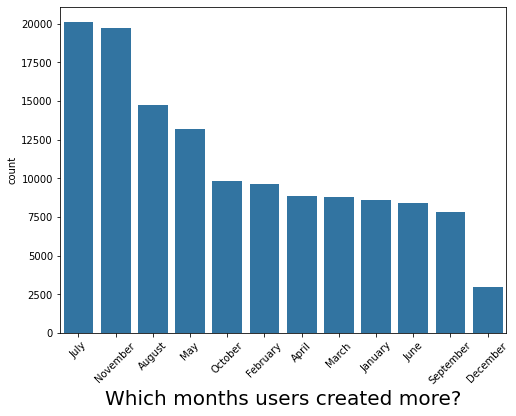

In [48]:
filtrd_df = tweet_df[tweet_df['usr_year'] == 2020]
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = filtrd_df['usr_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=filtrd_df, x='usr_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('Which months users created more?', fontsize=20);

> seems that July.,Nov. Aug., may., oct., feb. have more usrs created

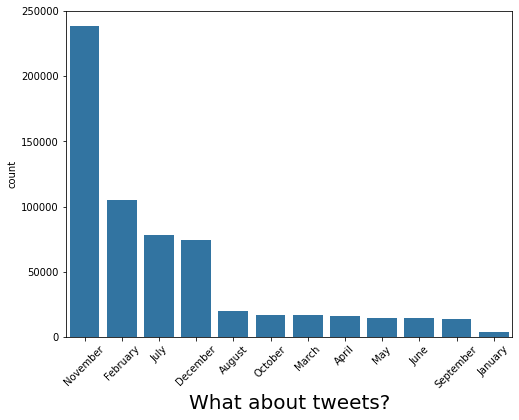

In [49]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = tweet_df['tweet_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=tweet_df, x='tweet_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('What about tweets?', fontsize=20);

> Nov., Feb., July.,Dec., Aug., interesting matching .. must have some events

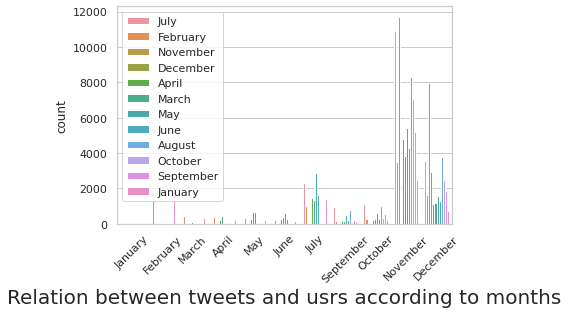

In [7]:
sns.set(style="whitegrid")
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September','October','November','December']
sb.countplot(data = tweet_df[tweet_df['usr_year'] == 2020], x='tweet_month', order=month_order, hue='usr_month')
plt.legend(loc='upper left')
plt.xticks(rotation=45);
plt.xlabel('Relation between tweets and usrs according to months', fontsize=20);

> Some months have common increase in usrs created and tweets tweeted by them .. sure for a reason

In [17]:
t = tweet_df. sort_values(["days"], ascending=True)
t

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month,cut_days
0,1281408241390559232,"""The Media Deception Of Amber Heard &amp; #MeT...",1281358767947489282,WanderlustBuzz_,Wanderlust Buzz 🐝,0,03:16:21,2020-07-10,02:01:46,2020-07-09,22:45:25,2020,July,2020,July,very low
2303,1224077910715310087,Dopo #AmberHeardIsAnAbuser ho dei dubbi sulla ...,1223912518093017088,chevitacc,comesisuperaCillianMurphy ?!,0,10:56:55,2020-02-02,21:11:30,2020-02-02,10:14:35,2020,February,2020,February,very low
2304,1325088599130386432,#JusticeForJohnnyDepp lo mejor de la pelicula ...,1325080677067468801,Angie06502563,littleWeasley🌻,0,00:31:17,2020-11-07,14:51:55,2020-11-07,14:20:38,2020,November,2020,November,very low
2305,1223877423277793281,Declaração dos policias: Amber após 20 min da ...,1223781748976377857,luvsdongie,-ˋˏ» Anna ⛓☁️,0,06:19:59,2020-02-02,07:54:50,2020-02-02,01:34:51,2020,February,2020,February,very low
2306,1293477478103687169,Amber Heard Apologist @stirgussa sharing pictu...,1293146611347070977,fury_marvel,Marvel.Fury,0,21:54:33,2020-08-12,09:20:37,2020-08-11,11:26:04,2020,August,2020,August,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512106,1318908235311583232,@joannekehoe Absolutely Mantzoukas. Momoa is o...,431533,Kate_Welsh,Kate W.,5041,09:07:36,2020-10-21,13:33:22,2007-01-02,04:25:46,2020,October,2007,January,high
512270,1323209006958215169,Actor Johnny Depp has lost his UK libel case o...,428333,cnnbrk,CNN Breaking News,5053,08:34:51,2020-11-02,10:23:05,2007-01-02,01:48:14,2020,November,2007,January,high
512665,1327303183933181952,DC Entertainment: Remove Amber Heard from Aqua...,70083,marul69,marul69,5082,06:56:15,2020-11-13,17:31:53,2006-12-15,10:35:38,2020,November,2006,December,high
513820,1340049002402856960,@StephenKing I don’t understand all the Amber ...,53053,nekosensei,Go Away Humans,5123,14:56:22,2020-12-18,21:39:13,2006-12-09,06:42:51,2020,December,2006,December,high


In [20]:
## making a cutting function
def cutting(col_name):
    return pd.cut(tweet_df[col_name], bins=4, labels=['very low','low', 'medium','high'])
tweet_df['cut_days']=cutting('days')

In [31]:
tweet_df[tweet_df['cut_days'] == 'very low']

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month,cut_days
0,1281408241390559232,"""The Media Deception Of Amber Heard &amp; #MeT...",1281358767947489282,WanderlustBuzz_,Wanderlust Buzz 🐝,0,03:16:21,2020-07-10,02:01:46,2020-07-09,22:45:25,2020,July,2020,July,very low
1,1224006472431833088,Click &amp; Learn\nhttps://t.co/VpBIW3PPod\n\n...,1223826099873947648,Tryallthings1,cristina,0,11:56:35,2020-02-02,16:27:38,2020-02-02,04:31:03,2020,February,2020,February,very low
2,1326578825992544256,#JusticeForJohnnyDepp Почему нельзя было досня...,1326376225112289283,Maria10953362,Maria,0,13:24:36,2020-11-11,17:33:33,2020-11-11,04:08:57,2020,November,2020,November,very low
3,1225374861494632449,คอลลาเจนยี่ห้อไหนดีคุณผู้หญิงทั้งหลายควรรู้\nh...,1225343194918899712,PeeradaPhungnoy,Peerada Phungnoy,0,02:05:42,2020-02-06,11:05:08,2020-02-06,08:59:26,2020,February,2020,February,very low
4,1329825151358291968,#justiceforjohnnydepp @TheNamesQ Is there any ...,1329561626895405056,Mewmewjusticef1,Mewmew#JusticeForJohnnyDepp#Justice4JenHowell,0,17:26:53,2020-11-20,16:33:17,2020-11-19,23:06:24,2020,November,2020,November,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,1339334417546940416,🏴‍☠️ #JusticeForJohnnyDepp https://t.co/vm4h3q...,977244583993184256,JamienColton,Colton J. Andersson🏴‍☠️,999,04:15:44,2020-12-16,22:19:43,2018-03-23,18:03:59,2020,December,2018,March,very low
612579,1289986744012533760,Remove Amber Heard from Aquaman 2\n\n472.726 p...,927931535541587968,deppbrazilfc,Johnny Depp BR 🇧🇷,999,01:58:09,2020-08-02,18:09:41,2017-11-07,16:11:32,2020,August,2017,November,very low
612580,1247949777968431104,"@sue_markaryan I didn't think it was possible,...",885907189759709184,faylovesflowers,AngieF,999,01:07:59,2020-04-08,18:09:47,2017-07-14,17:01:48,2020,April,2017,July,very low
612581,1327639368182476804,DC Entertainment: Remove Amber Heard from Aqua...,965273280868478976,jyrojastorre29,garver reds vlz,999,22:33:28,2020-11-14,15:47:46,2018-02-18,17:14:18,2020,November,2018,February,very low


In [14]:
tweet_df['cut_days'].value_counts()

very low    288657
medium      137511
low         129664
high         56751
Name: cut_days, dtype: int64

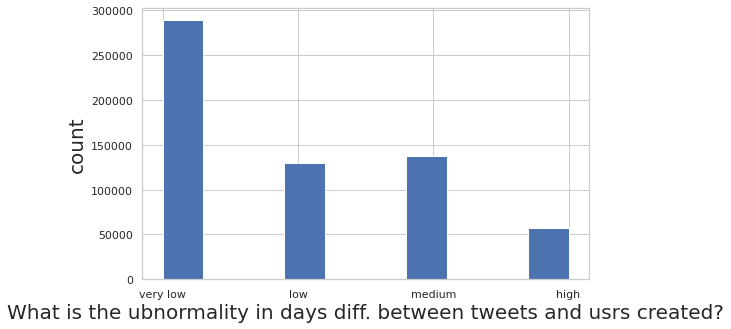

In [21]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. between tweets and usrs created?', fontsize=20);
plt.show();


> users created and tweeted imm.after creation is the most common feature!

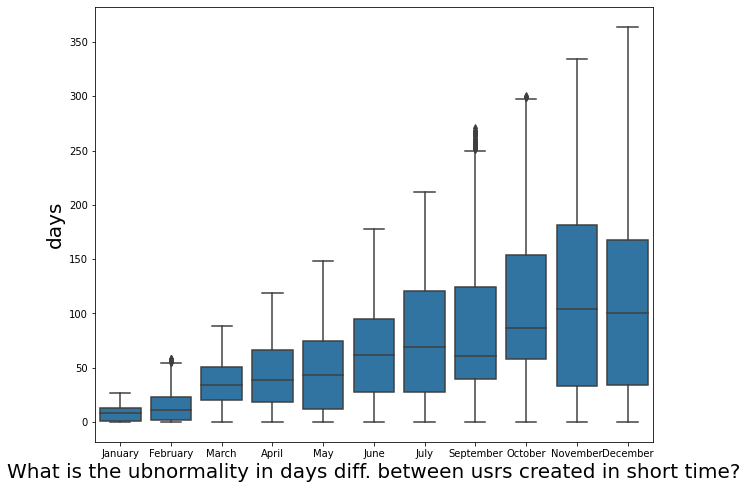

In [12]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September','October','November','December']
plt.figure(figsize=[10, 8])
sb.boxplot(data=filtrd_df, x='tweet_month', y='days',order=month_order, color=base_color);
plt.xlabel('tweet_month', fontsize=20);
plt.ylabel('days', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);


> in Jan., Feb. the days diff is less than one day more than other months and Mar., may., jul. the days diff is also in a very short period of time than rest of the months, This is for tweet_months

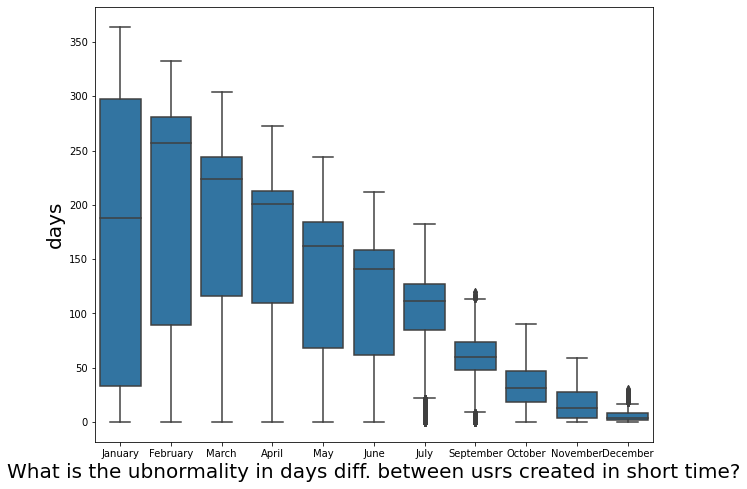

In [13]:
plt.figure(figsize=[10, 8])
sb.boxplot(data=filtrd_df, x='usr_month', y='days',order=month_order, color=base_color);
plt.xlabel('usr_month', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);
plt.ylabel('days', fontsize=20);

> According to user month of creation .. users created in jan. and feb.  are the most users tweeted in a short time and for jul. and nov. and dec. not alot of tweets but they are the most tweeted in almost 1 to 20 days of creation.

> # scatter plot of days vs. usr_month, with log transform on days y axis

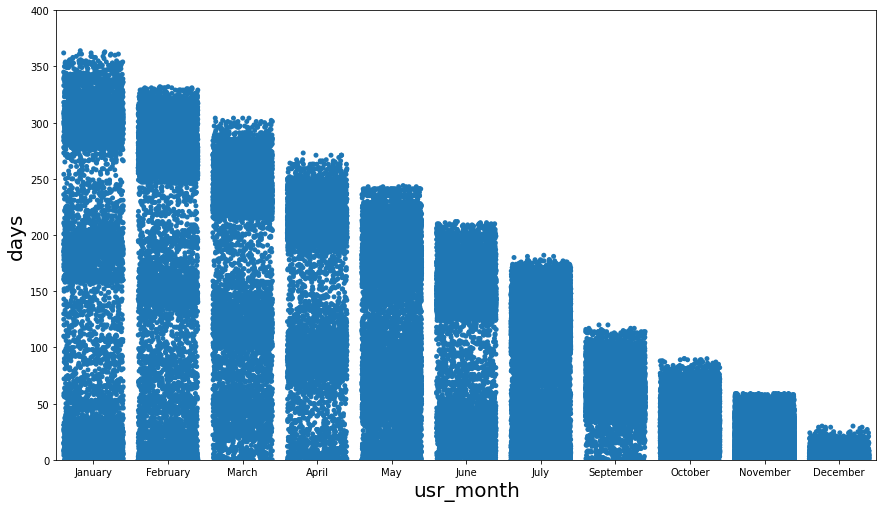

In [20]:

plt.figure(figsize = [14.70, 8.27])
sb.stripplot(data = filtrd_df, x = 'usr_month', y = 'days', jitter = 0.40, color = base_color, order = month_order)
plt.xlabel('usr_month', fontsize=20)
plt.ylim(0, 400)
plt.ylabel('days', fontsize=20)
plt.show();

> Usrs created in jan have the most tweets but have croudy regions as it appears .. first regions after they created then decreased their activity, then increased again between 150 - 200 days of creation ..etc, the same for the rest of months

In [21]:
# tweet_df.to_csv('clean_data.csv', index=False)
print('Saved a copy from the dataframe into a csv copy')

Saved a copy from the dataframe into a csv copy


In [51]:
clean_df = pd.read_csv("clean_data.csv")
clean_df

,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1214659714698633223,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,1609,17:32:28,2020-01-07,21:26:57,2015-08-12,03:54:29,2020,January,2015,August
1,1214658467836956673,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,281,04:43:35,2020-01-07,21:22:00,2019-04-01,16:38:25,2020,January,2019,April
2,1214657580837953536,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,3555,15:56:07,2020-01-07,21:18:29,2010-04-14,05:22:22,2020,January,2010,April
3,1214654926342758400,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2257,22:07:52,2020-01-07,21:07:56,2013-11-01,23:00:04,2020,January,2013,November
4,1214649017851957249,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2674,22:46:18,2020-01-07,20:44:27,2012-09-10,21:58:09,2020,January,2012,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612536,1335460896550789121,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,189,17:00:04,2020-12-06,05:47:44,2020-05-30,12:47:40,2020,December,2020,May
612537,1335460475996237824,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,109,02:19:01,2020-12-06,05:46:03,2020-08-19,03:27:02,2020,December,2020,August
612538,1335460343460540417,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,59,13:11:45,2020-12-06,05:45:32,2020-10-07,16:33:47,2020,December,2020,October
612539,1335459902752317442,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2187,17:26:05,2020-12-06,05:43:47,2014-12-10,12:17:42,2020,December,2014,December


In [52]:
clean_df['tweet_date'] = pd.to_datetime(clean_df['tweet_date'])
clean_df['user_create_date'] = pd.to_datetime(clean_df['user_create_date'])

### Now let's move deeper .. what are the top months in 2020 have the most usr creation?

In [28]:
clean_df[clean_df['usr_year']== 2020]['usr_month'].value_counts()

July         20093
November     19695
August       14738
May          13181
October       9855
February      9664
April         8889
March         8789
January       8622
June          8412
September     7809
December      2948
Name: usr_month, dtype: int64

> we will filter the data into months users created in
          
> now we will look closely at them.

In [168]:
z = clean_df[clean_df['usr_year']== 2020]
z.shape

(132695, 15)

> 132711 usrs were created in 2020 only .. by investigating each month seperately must have something in common

### July ... 

In [53]:
A = clean_df[clean_df['usr_month']== 'July'].sort_values(["days"], ascending=True)
# A[A['days']<=1]
print(A.shape[0])
A

59108


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
211670,1288460119173365763,@ibelievejdepp @lovelyjdepp_ We are hoping jus...,1288449006490783746,brightshiningl1,calling out the bull*^+*,0,00:43:52,2020-07-29,13:03:25,2020-07-29,12:19:33,2020,July,2020,July
183750,1286603253657014277,@ArrghBee Yes! Her tone gives it away each tim...,1286399494175838209,su94630292,Emily S 🌻,0,13:29:31,2020-07-24,10:04:54,2020-07-23,20:35:23,2020,July,2020,July
244110,1282940642939867141,Oh you thought I was gonna sit back and watch ...,1282776679933452288,hotston_macie,Macie Hotston,0,10:51:23,2020-07-14,07:30:59,2020-07-13,20:39:36,2020,July,2020,July
238341,1288798642078441472,#JusticeForJohnnyDepp,1288797236609130496,deppbot1,Sauvage1963,0,00:05:24,2020-07-30,11:28:35,2020-07-30,11:23:11,2020,July,2020,July
183616,1286614747849392129,Reliving all of this abuse day in day out of t...,1286399494175838209,su94630292,Emily S 🌻,0,14:15:11,2020-07-24,10:50:34,2020-07-23,20:35:23,2020,July,2020,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549588,1339527512355971077,"""Nothing could have prepared me for 2020.""\n\n...",7587032,SkyNews,Sky News,4899,20:24:07,2020-12-17,11:07:00,2007-07-19,14:42:53,2020,December,2007,July
548516,1339444786894430210,Amber Heard: 'Nothing could have prepared me f...,7587032,SkyNews,Sky News,4899,14:55:24,2020-12-17,05:38:17,2007-07-19,14:42:53,2020,December,2007,July
579490,1339846612869267456,"""Nothing could have prepared me for 2020.""\n\n...",7587032,SkyNews,Sky News,4900,17:32:07,2020-12-18,08:15:00,2007-07-19,14:42:53,2020,December,2007,July
542909,1339601247142293505,"""Nothing could have prepared me for 2020.""\n\n...",7587032,SkyNews,Sky News,4900,01:17:07,2020-12-17,16:00:00,2007-07-19,14:42:53,2020,December,2007,July


In [55]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59108 entries, 211670 to 578761
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_str            59108 non-null  int64         
 1   full_text         59108 non-null  object        
 2   user.id_str       59108 non-null  int64         
 3   user.screen_name  59108 non-null  object        
 4   user.name         59108 non-null  object        
 5   days              59108 non-null  int64         
 6   hours             59108 non-null  object        
 7   tweet_date        59108 non-null  datetime64[ns]
 8   tweet_time        59108 non-null  object        
 9   user_create_date  59108 non-null  datetime64[ns]
 10  user_create_time  59108 non-null  object        
 11  tweet_year        59108 non-null  int64         
 12  tweet_month       59108 non-null  object        
 13  usr_year          59108 non-null  int64         
 14  usr_month       

In [380]:
A['cut_days'] = cutting('days')

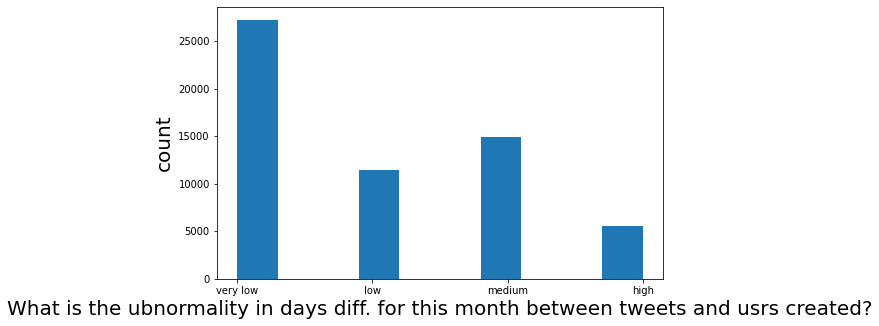

In [383]:
plt.figure(figsize=[8, 5])
plt.hist(data = A, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. for this month between tweets and usrs created?', fontsize=20);
plt.show();

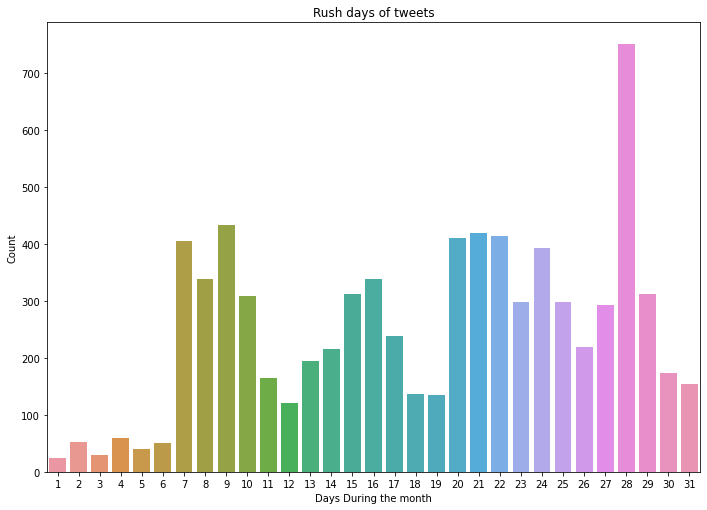

In [54]:
fltrd_A = A[A['tweet_month']== 'July'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_A['tweet_date'].dt.day, data = A)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Jul. peaks are (7,8,9,10,16,20,21,22,24,28).

In [193]:
A['usr_year'].value_counts()

2020    20093
2009     5233
2019     4893
2018     4223
2011     4015
2017     3488
2016     3144
2012     3103
2010     2755
2015     2604
2014     2434
2013     2307
2008      548
2007      268
Name: usr_year, dtype: int64

In [30]:
tt = A.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 444
no. of tweet from 2020 users: 20091


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
40069,1279752159538675712,July,2020,@kanyewest Ps... Isn't this the dude that had ...,0,02:25:41,2020-07-05,July,1
47500,1284564561199271939,July,2020,@ellisgreg @thebettinaarndt @JaniceFiamengo @m...,0,21:57:58,2020-07-19,July,1
47501,1284564561199271939,July,2020,@jessphillips is this a click bait? otherwise ...,0,18:06:40,2020-07-19,July,1
50139,1286385937761673216,July,2020,DC Entertainment: Remove Amber Heard from Aqua...,0,22:41:50,2020-07-24,July,1
42693,1281339148549402624,July,2020,"Q ela fez ele passar, até eu ficaria puta de r...",0,16:58:00,2020-07-10,July,1
...,...,...,...,...,...,...,...,...,...
40315,1280167567156445184,December,2020,@varindersingh24 Amber Heard 🎃,178,04:18:41,2020-12-31,July,1
39862,1279114767387557889,December,2020,fdc eu amo ele #JusticeForJohnnyDepp,180,06:28:54,2020-12-31,July,1
39634,1279084967084122113,December,2020,"In 2020 Johnny Depp joined Instagram, the audi...",181,01:24:33,2020-12-31,July,1
39402,1278715029441912832,December,2020,"Ou seja, ele foi mau falado por anos para agor...",181,05:10:25,2020-12-30,July,1


In [196]:
freq_usrs_jul = A.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_jul.shape[0]))
freq_usrs_jul

no. of all frequent users: 17592


,user.id_str,id_count
0,7189552,1
1,7226062,1
2,7228352,53
3,7245842,1
4,7270402,1
...,...,...
17587,1289318867307835392,1
17588,1289319003723366400,2
17589,1289331041472090112,9
17590,1289334440540483589,1


In [197]:
freq_fresh_usrs_jul = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_jul.shape[0]))
freq_fresh_usrs_jul

no. of frequent fresh users (2020) : 2679


,user.id_str,id_count
0,1278117440963121155,2
1,1278118191982501890,1
2,1278118282705469440,1
3,1278118437890523141,1
4,1278127448408895491,1
...,...,...
2674,1289318867307835392,1
2675,1289319003723366400,2
2676,1289331041472090112,9
2677,1289334440540483589,1


In [203]:
freq_jul_usrs = set(list(freq_fresh_usrs_jul["user.id_str"]))
len(freq_jul_usrs)

2679

In [207]:
freq_jul_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_jul_usrs)]
print('How often did those users created in july tweeted after that in 2020?')
freq_jul_usrs_all_data['tweet_month'].value_counts()

How often did those users created in july tweeted after that in 2020?


November     10880
December      3541
July          2335
August        1288
October       1108
September      941
Name: tweet_month, dtype: int64

### Many tweets are from same user in the same day and also all are fresh users .. by checking the shape pf whole tweets in jul/2020 (59113) .. only from (17596) user_id 
#### no. of tweet from fresh users in same day: 444
#### Total no. of tweet from 2020 users: 20091
#### no. of frequent fresh users (2020) : 2679

### November ...

In [31]:
B = clean_df[clean_df['usr_month']== 'November'].sort_values(["days"], ascending=True)
print(B.shape[0])
B

61171


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
312456,1327304035913912323,DC Entertainment: Remove Amber Heard from Aqua...,1327301076337438720,waldemi81695967,waldemir,0,00:11:16,2020-11-13,17:35:16,2020-11-13,17:24:00,2020,November,2020,November
452547,1325700245129359361,#JusticeForJohnnyDepp,1325657626005311488,Aviana20151,Aviana2015,0,02:48:52,2020-11-09,07:22:23,2020-11-09,04:33:31,2020,November,2020,November
452501,1325702246047363073,"Johnny Depp fans demand that justice be done, ...",1325631562986172416,Trafit23718,trafit,0,04:40:34,2020-11-09,07:30:20,2020-11-09,02:49:46,2020,November,2020,November
487928,1325456686048546817,"Надеюсь, скоро все встанет на свои места. Во в...",1325454950663598080,1nf2xSzbUmd2CS5,Марика Макей,0,00:06:34,2020-11-08,15:14:34,2020-11-08,15:08:00,2020,November,2020,November
452463,1325703392543576064,@katiehind @realamberheard Most of JD supporte...,1325433835144830976,voodievoo,voodoo doll,0,17:50:20,2020-11-09,07:34:53,2020-11-08,13:44:33,2020,November,2020,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39310,1224087927564705794,It is possible for men to be victims of intima...,13696,TaePhoenix,Tae Phoenix,4820,22:41:31,2020-02-02,21:51:19,2006-11-21,23:09:48,2020,February,2006,November
156135,1269841474155417600,@AASwiftie13 @dianelyssa I'm all for saying a ...,13953,busybooklife,Sherry Osborne (She/Her),4946,23:57:41,2020-06-08,03:59:34,2006-11-22,04:01:53,2020,June,2006,November
164738,1276624295435931661,As an abuse victim of multiple types through m...,11519,Matdredalia,Mattie 🏳️‍🌈 ♍,4982,13:27:05,2020-06-26,21:12:05,2006-11-05,07:45:00,2020,June,2006,November
164726,1276625127619416064,The reality is nobody hates false accusers mor...,11519,Matdredalia,Mattie 🏳️‍🌈 ♍,4982,13:30:23,2020-06-26,21:15:23,2006-11-05,07:45:00,2020,June,2006,November


In [211]:
print('Fresh users in 2020 are most tweeted on Nov.')
B['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Nov.


2020    19695
2019     8248
2015     5499
2018     3986
2017     3774
2011     3666
2012     3209
2009     2917
2016     2867
2010     2266
2013     2019
2014     1983
2008      723
2007      314
2006        5
Name: usr_year, dtype: int64

In [52]:
clean_df[clean_df['usr_month'] == 'November']['user.name'].value_counts()

🍩🍉M.G. Justice For Johnny Depp⚖Wald-Mignon🦋🌞🌷    3668
Manny🐍                                            876
Raúl Sobas #JusticeForJohnnyDepp                  859
Joanna Woodley                                    771
Nitawho WaldMignon 🧙‍♀️🗡⚖🛡⚔🏹                      699
                                                 ... 
Mrs. Snape 🐍                                        1
blueming.                                           1
๓เςคђ ๓คﻮﻮคг๔ #LLJ #LLJW                            1
Floor Dobreva ⎊                                     1
Alejandro Hernández                                 1
Name: user.name, Length: 14932, dtype: int64

In [50]:
clean_df[clean_df['usr_month'] == 'November']['user.id_str'].value_counts()

4194755003             3668
1323227735351828481     876
1196757169162588160     859
1194347545578950657     771
930499988               699
                       ... 
1193248691450269698       1
1198350435100381184       1
424395444                 1
1198033821209219074       1
1197358356073254912       1
Name: user.id_str, Length: 15569, dtype: int64

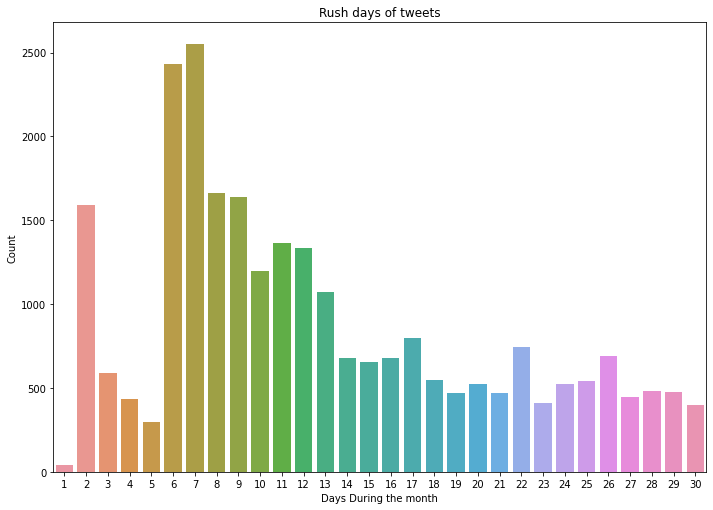

In [50]:
fltrd_B = B[B['tweet_month']== 'November'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_B['tweet_date'].dt.day, data = B)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Nov. peaks are (2,6,7,8,9,11,12).

In [32]:
tt = B.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 2846
no. of tweet from 2020 users: 19694


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
53506,1325595191747686400,November,2020,@realamberheard you’re a trashy ass person and...,0,01:47:41,2020-11-09,November,1
53857,1325801298554462208,November,2020,@warnerbros If you do not put Johnny Depp back...,0,00:05:54,2020-11-09,November,1
53856,1325801218568982529,November,2020,I am completely boycotting Warner Bros because...,0,00:21:32,2020-11-09,November,1
53855,1325801218568982529,November,2020,"But then also if you want to do so, then pleas...",0,03:11:44,2020-11-09,November,1
53854,1325801218568982529,November,2020,Amber Heard is a bitch and the most vicious mo...,0,03:17:23,2020-11-09,November,1
...,...,...,...,...,...,...,...,...,...
43787,1323258758638829568,December,2020,Hi all Finnish #deppheads! Join the the #DeppM...,59,04:39:58,2020-12-31,November,1
42351,1323222529423646723,December,2020,Johnny's new post on Instagram 😍✨\n#newyear\n#...,59,11:49:43,2020-12-31,November,1
42343,1323222529423646723,December,2020,I literally don't understand what he says. The...,59,07:30:38,2020-12-31,November,1
43775,1323258758638829568,December,2020,Happy New Year #deppheads 💙💙\n#JusticeForJohnn...,59,08:18:17,2020-12-31,November,1


In [214]:
freq_usrs_nov = B.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_nov.shape[0]))
freq_usrs_nov

no. of all frequent users: 15562


,user.id_str,id_count
0,11519,2
1,12552,1
2,13696,1
3,13953,1
4,9906832,1
...,...,...
15557,1333495440101273604,1
15558,1333498741744087041,1
15559,1333520795012911108,1
15560,1333544259304173568,1


In [215]:
freq_fresh_usrs_nov = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_nov.shape[0]))
freq_fresh_usrs_nov

no. of frequent fresh users (2020) : 2276


,user.id_str,id_count
0,1322694105760206853,1
1,1322695472046346240,1
2,1322706014815342592,1
3,1322710482000637952,1
4,1322719339989114881,2
...,...,...
2271,1333495440101273604,1
2272,1333498741744087041,1
2273,1333520795012911108,1
2274,1333544259304173568,1


In [216]:
freq_nov_usrs = set(list(freq_fresh_usrs_nov["user.id_str"]))
len(freq_nov_usrs)

2276

In [217]:
freq_nov_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_nov_usrs)]
print('How often did those users created in november tweeted after that in 2020?')
freq_nov_usrs_all_data['tweet_month'].value_counts()

How often did those users created in november tweeted after that in 2020?


November    11706
December     7989
Name: tweet_month, dtype: int64

### The same here (61180 tweets) .. only (15569 users)
#### no. of tweet from fresh users in same day: 2846
#### Total no. of tweet from 2020 users: 19694
#### no. of frequent fresh users (2020) : 2276
#### no. of all frequent users: 15562

### August ...

In [33]:
C = clean_df[clean_df['usr_month']== 'August'].sort_values(["days"], ascending=True)
print(C.shape[0])
C

55289


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
267585,1296065824852267008,Why wouldn´t she want to prove her innocence i...,1296052257717399553,bee_pau,Papaya Bee,0,00:53:48,2020-08-19,12:45:47,2020-08-19,11:51:59,2020,August,2020,August
251096,1290662007071531012,@ryanleone85 So this is what she looks like wi...,1290638589806739456,Platoon1979,For Johnny,0,01:32:40,2020-08-04,14:52:56,2020-08-04,13:20:16,2020,August,2020,August
268256,1296172003951611912,"Amber Heard olmanın en güzel yanı, Türkiye'ye ...",1296111792708517888,enguzelyani,En Güzel Yanı,0,03:59:06,2020-08-19,19:47:42,2020-08-19,15:48:36,2020,August,2020,August
251244,1290535986447953920,Emily Ratajkowski and Amber heard https://t.co...,1290532116363718656,CelebrityMorph2,Celebrity Morpher,0,00:15:03,2020-08-04,06:32:10,2020-08-04,06:17:07,2020,August,2020,August
251366,1290731317995462656,"#AmberHeard abused her ex wife, her ex persona...",1290638589806739456,Platoon1979,For Johnny,0,06:08:05,2020-08-04,19:28:21,2020-08-04,13:20:16,2020,August,2020,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573005,1336845543675482113,Johnny Depp tentou fazer com que Amber Heard f...,8166502,revistamonet,Revista MONET,4867,06:05:52,2020-12-10,01:29:49,2007-08-13,19:23:57,2020,December,2007,August
583576,1338654423636176897,Amber Heard cobrará miles de euros por confere...,8105922,clarincom,Clarín,4875,10:03:29,2020-12-15,01:17:40,2007-08-10,15:14:11,2020,December,2007,August
609010,1338578255310274560,La justicia de Reino Unido declaró taxativamen...,7996082,el_pais,EL PAÍS,4879,03:54:51,2020-12-14,20:15:00,2007-08-06,16:20:09,2020,December,2007,August
539950,1339383620058767361,"@DesideriaMesa @Feisty_Ginger_6 yes, men are s...",8009972,dbunting,Pr0toc01,4880,22:43:57,2020-12-17,01:35:14,2007-08-07,02:51:17,2020,December,2007,August


In [48]:
clean_df['user.name'].value_counts()

Support Johnny Depp ♡ Stream City of Lies        4297
Marley M                                         4023
🍩🍉M.G. Justice For Johnny Depp⚖Wald-Mignon🦋🌞🌷    3668
Princess Consuela Bananahammock                  2656
good will                                        2165
                                                 ... 
hellzbellz                                          1
Joe Morgan                                          1
Ангелина                                            1
Simón Lukas🛀                                        1
Suessafluff                                         1
Name: user.name, Length: 175544, dtype: int64

In [60]:
clean_df[clean_df['usr_month'] == 'August']['user.id_str'].value_counts()

764700822768758784     1886
1290638589806739456    1403
1290825148929474561     833
1293146611347070977     804
1024753499467382784     773
                       ... 
1032766594450182144       1
739450856                 1
3379824619                1
1158515654485520384       1
1164585102912999427       1
Name: user.id_str, Length: 16950, dtype: int64

In [219]:
print('Fresh users in 2020 are most tweeted on Aug.')
C['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Aug.


2020    14738
2018     5961
2019     5591
2016     4247
2009     4061
2017     3532
2010     3214
2011     3184
2012     2971
2014     2406
2013     2343
2015     2323
2008      527
2007      190
2006        1
Name: usr_year, dtype: int64

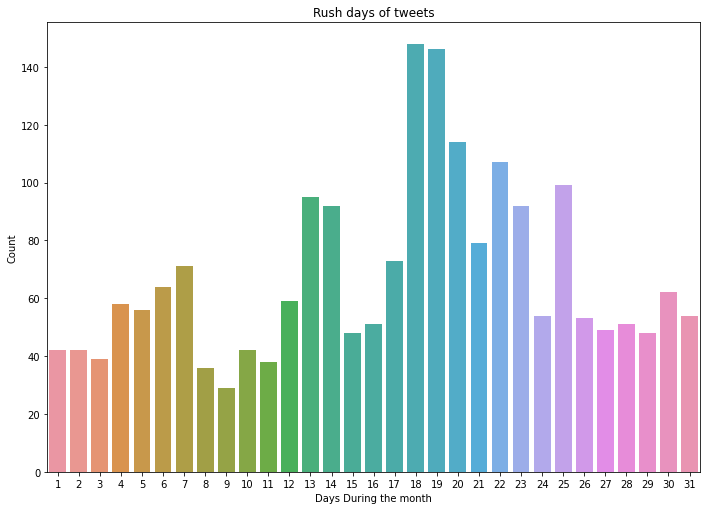

In [49]:
fltrd_C = C[C['tweet_month']== 'August'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_C['tweet_date'].dt.day, data = C)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> Aug. peaks (7,13,14,18,19,20,23,25).

In [34]:
tt = C.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 153
no. of tweet from 2020 users: 14738


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
53434,1298460954481643522,August,2020,I don't know what the heck happened to my old ...,0,00:38:12,2020-08-26,August,1
41595,1290638589806739456,August,2020,#metoo\n#TimesUp \n#justiceforjohnnydepp \n#Am...,0,23:40:23,2020-08-05,August,1
41594,1290638589806739456,August,2020,#justiceforjohnnydepp Amber Heard = fake hair ...,0,05:18:51,2020-08-04,August,1
41565,1290638589806739456,August,2020,"#AmberHeard abused her ex wife, her ex persona...",0,06:08:05,2020-08-04,August,1
50955,1296588200203304960,August,2020,@ThatBrianFella @sunhopepeace Amber Heard thin...,0,22:22:25,2020-08-21,August,1
...,...,...,...,...,...,...,...,...,...
40622,1289606115840458752,December,2020,Fofoooo ❤\n#JusticeForJohnnyDepp,151,03:49:49,2020-12-30,August,1
40621,1289606115840458752,December,2020,Então né\n#JusticeForJohnnyDepp,151,04:02:27,2020-12-30,August,1
40620,1289606115840458752,December,2020,EU AMOOOOO \n#JusticeForJohnnyDepp,151,03:24:28,2020-12-30,August,1
40769,1289654120140464129,December,2020,QQ rolou com o Johnny Deep?\n#JusticeForJohnny...,151,00:06:43,2020-12-30,August,1


In [221]:
freq_usrs_aug = C.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_aug.shape[0]))
freq_usrs_aug

no. of all frequent users: 16949


,user.id_str,id_count
0,3669,1
1,7868352,1
2,7895652,1
3,7903962,1
4,7905772,1
...,...,...
16944,1300543246452617216,1
16945,1300566531907092480,1
16946,1300568934152716289,1
16947,1300571399837356033,2


In [222]:
freq_fresh_usrs_aug = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_aug.shape[0]))
freq_fresh_usrs_aug

no. of frequent fresh users (2020) : 2242


,user.id_str,id_count
0,1289352452744110082,1
1,1289352916306808833,1
2,1289358794082975746,8
3,1289364795930673152,6
4,1289365453899522048,2
...,...,...
2237,1300543246452617216,1
2238,1300566531907092480,1
2239,1300568934152716289,1
2240,1300571399837356033,2


In [223]:
freq_aug_usrs = set(list(freq_fresh_usrs_aug["user.id_str"]))
len(freq_aug_usrs)

2242

In [224]:
freq_aug_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_aug_usrs)]
print('How often did those users created in august tweeted after that in 2020?')
freq_aug_usrs_all_data['tweet_month'].value_counts()

How often did those users created in august tweeted after that in 2020?


November     8312
December     3764
October      1002
August        853
September     807
Name: tweet_month, dtype: int64

### many User.names identical and many are fresh users. with interesting names
### The same here (55289 tweets) .. only (16949 users)
#### no. of tweet from fresh users in same day: 153
#### Total no. of tweet from 2020 users: 14738
#### no. of frequent fresh users (2020) : 2242
#### no. of all frequent users: 16949

### May ...

In [35]:
D = clean_df[clean_df['usr_month']== 'May'].sort_values(["days"], ascending=True)
print(D.shape[0])
D

53739


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
151953,1258842748087676936,@ReemDepp @mderndarkwizard #JUSTICEFORJOHNNYDE...,1258571125895966721,mercyacastro2,Mercya Rodrigues,0,17:58:58,2020-05-08,19:34:33,2020-05-08,01:35:35,2020,May,2020,May
149737,1265212260391288832,@TheInfamousOne6 @johnnysvampires Unfortunatel...,1264878914243100672,PartyTheToLate,LateToTheParty,0,22:04:07,2020-05-26,09:24:44,2020-05-25,11:20:37,2020,May,2020,May
145313,1256775315214516226,DC Entertainment: Remove Amber Heard from Aqua...,1256640242502832129,massimo_maisto,Massimo Maisto,0,08:56:26,2020-05-03,02:39:19,2020-05-02,17:42:53,2020,May,2020,May
145882,1260978152282578944,"This ""legal reporter"" is really out here pract...",1260931322001764353,SnarkTealicious,TealiciousSnark,0,03:05:07,2020-05-14,16:59:54,2020-05-14,13:54:47,2020,May,2020,May
153234,1261685949785751553,AMBER HEARD 💍 https://t.co/k8l00C7LIs,1261546380373356544,SelfCareGold11,Self Care Gold,0,09:14:26,2020-05-16,15:52:26,2020-05-16,06:38:00,2020,May,2020,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608141,1344583196625809409,And I am sure this number will keep going up! ...,6323772,Angiex0101,Nor33 🇫🇷,4968,15:00:51,2020-12-31,09:56:29,2007-05-25,18:55:38,2020,December,2007,May
583891,1338796577968680960,"Amber Heard, entusiasta di Justice League Snyd...",5893702,SkyTG24,Sky tg24,4969,00:44:06,2020-12-15,10:42:32,2007-05-09,09:58:26,2020,December,2007,May
547460,1339680400982093824,Warner Brothers: To get Amber Heard fired in A...,5839082,nanook660,Fran The INFINITE Fan,4973,03:30:12,2020-12-17,21:14:32,2007-05-07,17:44:20,2020,December,2007,May
550631,1339676800696381440,#JusticeForJohnnyDepp \nHe was the victim and ...,5839082,nanook660,Fran The INFINITE Fan,4973,03:15:53,2020-12-17,21:00:13,2007-05-07,17:44:20,2020,December,2007,May


In [299]:
clean_df[clean_df['usr_month'] == 'May']['user.id_str'].value_counts()

305700310              2165
301831339              1910
1259964873246531585    1088
1266718334915096576     751
6323772                 718
                       ... 
864587401792040960        1
3243792615                1
2537097453                1
1131202251777822722       1
1127060968435937280       1
Name: user.id_str, Length: 16813, dtype: int64

In [306]:
print('Fresh users in 2020 are most tweeted on May.')
D['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on May.


2020    13181
2011     7041
2009     5078
2017     4101
2019     3973
2010     3601
2018     3464
2012     2935
2016     2570
2015     2457
2013     2188
2014     2065
2007      853
2008      232
Name: usr_year, dtype: int64

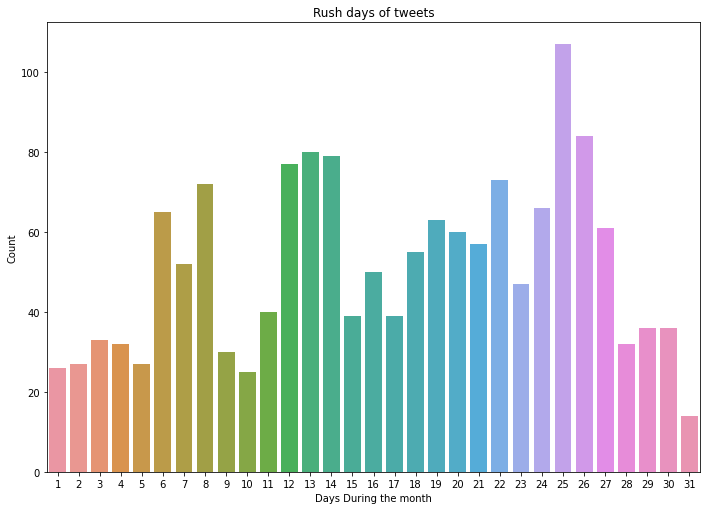

In [55]:
fltrd_D = D[D['tweet_month']== 'May'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_D['tweet_date'].dt.day, data = D)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In May peaks (6,8,11,12,13,18,19,22,24,25,26,27).

In [36]:
tt = D.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 166
no. of tweet from 2020 users: 13181


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
48194,1262708584967790593,May,2020,Justice for Johnny Depp | Every Story has two ...,0,00:55:41,2020-05-19,May,1
45741,1260253321945849857,May,2020,What about trying to make #HappyBirthdayJohnny...,0,04:34:43,2020-05-12,May,1
50346,1264157042274643968,May,2020,AH and the media are still digging that deep h...,0,02:34:38,2020-05-23,May,1
45694,1260253321945849857,May,2020,@JerrellZod2 So... defending a victim makes me...,0,03:46:52,2020-05-12,May,1
45025,1259964873246531585,May,2020,@TheInfamousOne6 No surprise they want people ...,0,06:26:22,2020-05-12,May,1
...,...,...,...,...,...,...,...,...,...
41254,1256519900429979649,December,2020,De toda la saga esta es mi favorita. ¡ES ESPEC...,243,05:10:45,2020-12-31,May,1
41263,1256519900429979649,December,2020,Estáis viendo Piratas del Caribe en el fin del...,243,05:00:50,2020-12-31,May,1
40830,1256270081241251841,December,2020,"Cross fingers, toes, and everything else. 😉\n#...",243,21:20:53,2020-12-31,May,1
40828,1256270081241251841,December,2020,Because deleting over 700 IG posts once you’ve...,243,21:35:33,2020-12-31,May,1


In [302]:
freq_usrs_may = D.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_may.shape[0]))
freq_usrs_may

no. of all frequent users: 16813


,user.id_str,id_count
0,5695632,1
1,5698002,1
2,5706262,1
3,5715752,1
4,5751602,8
...,...,...
16808,1267242272913063937,1
16809,1267242487728541696,1
16810,1267242563548962816,1
16811,1267243206871138304,1


In [303]:
freq_fresh_usrs_may = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_may.shape[0]))
freq_fresh_usrs_may

no. of frequent fresh users (2020) : 2729


,user.id_str,id_count
0,1256017039442890752,12
1,1256017386601418752,1
2,1256021162989158401,1
3,1256023288423297026,1
4,1256028293037469696,1
...,...,...
2724,1267242272913063937,1
2725,1267242487728541696,1
2726,1267242563548962816,1
2727,1267243206871138304,1


In [304]:
freq_may_usrs = set(list(freq_fresh_usrs_may["user.id_str"]))
len(freq_may_usrs)

2729

In [305]:
freq_may_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_may_usrs)]
print('How often did those users created in may tweeted after that in 2020?')
freq_may_usrs_all_data['tweet_month'].value_counts()

How often did those users created in may tweeted after that in 2020?


November     5396
July         2865
December     1570
August       1003
May           646
October       605
June          601
September     495
Name: tweet_month, dtype: int64

### The same here (53739 tweets) .. only (16813 users)
#### no. of tweet from fresh users in same day: 166
#### Total no. of tweet from 2020 users: 13181
#### no. of frequent fresh users (2020) : 2729
#### no. of all frequent users: 16813

### October ...

In [37]:
E = clean_df[clean_df['usr_month']== 'October'].sort_values(["days"], ascending=True)
print(E.shape[0])
E

45106


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
289607,1314134633429245952,@poisonxharleen have you really looked into th...,1314130377322233856,cestdufromage,Chloé Si,0,00:16:49,2020-10-08,09:24:46,2020-10-08,09:07:57,2020,October,2020,October
284325,1316773779314540546,#AmberHeardIsAnAbuser\n#AmberHeardIsALiar\n#Gi...,1316534248510283776,JohnnysAngel3,Johnny’s Angel,0,15:51:17,2020-10-15,16:11:48,2020-10-15,00:20:31,2020,October,2020,October
286637,1319676540754558976,Bridget McKenzie: Amber Heard to be prosecuted...,1319675152280489984,KateZeta2,Kate Zeta,0,00:05:17,2020-10-23,16:26:20,2020-10-23,16:21:03,2020,October,2020,October
284377,1316579880478351365,#JusticeForJohnnyDepp,1316534248510283776,JohnnysAngel3,Johnny’s Angel,0,03:00:48,2020-10-15,03:21:19,2020-10-15,00:20:31,2020,October,2020,October
292323,1318231867053772801,@chrspineapple The guy who won't make another ...,1317937397682888705,MelvinS19921032,MelvinScott,0,19:29:58,2020-10-19,16:45:43,2020-10-18,21:15:45,2020,October,2020,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555179,1336401631794114560,um ... my kid signed a petition to “replace am...,9660832,rockle,rockle,4794,02:24:49,2020-12-08,20:05:52,2007-10-24,17:41:03,2020,December,2007,October
428736,1332648438736031744,ROSENKRIEG MIT JOHNNY DEPP - Kino-Fans haben k...,9330602,BILD_Promis,BILD Promis,4798,20:28:14,2020-11-28,11:32:01,2007-10-09,15:03:47,2020,November,2007,October
428739,1332647579553771520,ROSENKRIEG MIT JOHNNY DEPP - Kino-Fans haben k...,9204502,BILD,BILD,4806,02:11:56,2020-11-28,11:28:37,2007-10-02,09:16:41,2020,November,2007,October
571912,1336873824592203777,@THR You got it completely backwards.\n\nAmber...,9267212,Zachariahskylab,"Admiral Ackbar, Reality Czar",4814,10:20:20,2020-12-10,03:22:12,2007-10-05,17:01:52,2020,December,2007,October


In [291]:
clean_df[clean_df['usr_month'] == 'October']['user.id_str'].value_counts()

782060525966413825     655
1314223215301087232    567
1313513261921427456    513
1050721822092812289    451
1319007523056308227    449
                      ... 
1179134582211276800      1
1322317427062046721      1
1057273616646041601      1
1950236772               1
2841624440               1
Name: user.id_str, Length: 16153, dtype: int64

In [292]:
print('Fresh users in 2020 are most tweeted on Oct.')
E['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Oct.


2020    9855
2019    5428
2018    4336
2009    3606
2016    3528
2011    3383
2015    2657
2012    2541
2017    2512
2014    2405
2013    2400
2010    1864
2008     503
2007      87
2006       1
Name: usr_year, dtype: int64

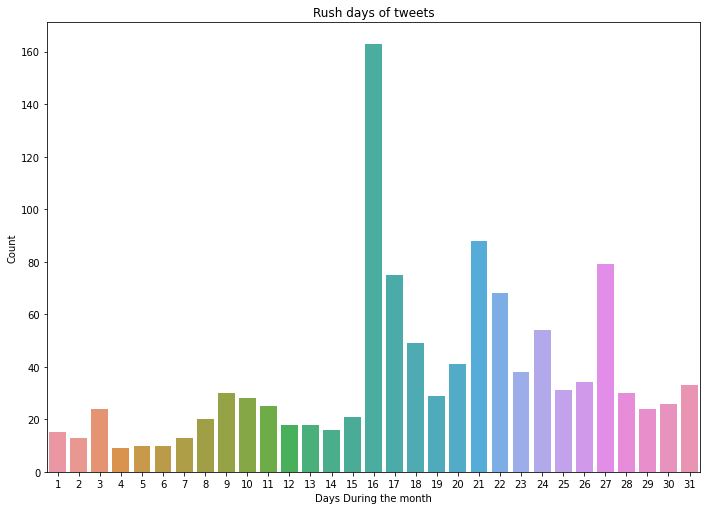

In [57]:
fltrd_E = E[E['tweet_month']== 'October'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_E['tweet_date'].dt.day, data = E)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Oct. Peaks (16, 21, 27).

In [38]:
tt = E.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 92
no. of tweet from 2020 users: 9855


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
43268,1320789565389656065,October,2020,DC Entertainment: Remove Amber Heard from Aqua...,0,17:32:52,2020-10-27,October,1
39920,1316962683762233349,October,2020,@davido Check out my Gig on Fiverr: do organic...,0,06:53:56,2020-10-16,October,1
39919,1316962683762233349,October,2020,@davido Check out my Gig on Fiverr: do organic...,0,06:53:08,2020-10-16,October,1
39918,1316962683762233349,October,2020,@RandPaul @realDonaldTrump Check out my Gig on...,0,06:54:22,2020-10-16,October,1
37820,1314130377322233856,October,2020,@poisonxharleen have you really looked into th...,0,00:16:49,2020-10-08,October,1
...,...,...,...,...,...,...,...,...,...
35759,1312405418174541824,December,2020,True. #AmberHeardisALiar #AmberHeardIsStupid,89,08:56:46,2020-12-31,October,1
35354,1311707245055414272,December,2020,"Agreed, can’t wait to see the plans. Let make ...",89,03:43:33,2020-12-29,October,1
35289,1311641715413983236,December,2020,#NewProfilePic2️⃣0️⃣2️⃣1️⃣ #b3012 #ปีใหม่2564 ...,90,06:01:11,2020-12-30,October,1
35493,1311932723091644416,December,2020,@TristaMakeup @JaredLeto No. We won't. #Justic...,90,00:49:43,2020-12-31,October,1


In [294]:
freq_usrs_oct = C.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_oct.shape[0]))
freq_usrs_oct

no. of all frequent users: 16949


,user.id_str,id_count
0,3669,1
1,7868352,1
2,7895652,1
3,7903962,1
4,7905772,1
...,...,...
16944,1300543246452617216,1
16945,1300566531907092480,1
16946,1300568934152716289,1
16947,1300571399837356033,2


In [295]:
freq_fresh_usrs_oct = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_oct.shape[0]))
freq_fresh_usrs_oct

no. of frequent fresh users (2020) : 2400


,user.id_str,id_count
0,1311458336869580800,1
1,1311462303473307653,1
2,1311486583355240448,1
3,1311491602922246145,1
4,1311491702876758016,1
...,...,...
2395,1322675582518366210,3
2396,1322679273027784704,1
2397,1322682323070980096,1
2398,1322685977853308930,1


In [296]:
freq_oct_usrs = set(list(freq_fresh_usrs_oct["user.id_str"]))
len(freq_oct_usrs)

2400

In [297]:
freq_oct_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_oct_usrs)]
print('How often did those users created in august tweeted after that in 2020?')
freq_oct_usrs_all_data['tweet_month'].value_counts()

How often did those users created in august tweeted after that in 2020?


November    7033
December    2487
October      335
Name: tweet_month, dtype: int64

### The same here (45106 tweets) .. only (16159 users)
#### no. of tweet from fresh users in same day: 92
#### Total no. of tweet from 2020 users: 9855
#### no. of frequent fresh users (2020) : 2400
#### no. of all frequent users: 16159

### February ...

In [39]:
F = clean_df[clean_df['usr_month']== 'February'].sort_values(["days"], ascending=True)
print(F.shape[0])
F

44727


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
21055,1224640929316757504,Men can get abused too. Men can get raped too....,1224633554815946753,feminist_brown,Brown Feminist,0,00:29:07,2020-02-04,10:28:44,2020-02-04,09:59:37,2020,February,2020,February
93401,1224020426814214145,And a petition to have her released from #Aqua...,1224001418165510144,KingLawryn,KingLawryn,0,01:15:25,2020-02-02,17:23:05,2020-02-02,16:07:40,2020,February,2020,February
93332,1224021053829070848,DC Entertainment: Remove Amber Heard from Aqua...,1224017463622266880,horsetears,酷儿橙,0,00:14:07,2020-02-02,17:25:35,2020-02-02,17:11:28,2020,February,2020,February
93331,1224021058971303936,ข่าวรอบวัน\nไวรัสโคโรนา คร่าแล้ว 259 ศพ ติดเชื...,1223984298224582656,javggagav,JKR,0,02:25:52,2020-02-02,17:25:36,2020-02-02,14:59:44,2020,February,2020,February
93127,1223889928226058245,No dia 09/08/2016 Amber se recusou a dar seu d...,1223781748976377857,luvsdongie,-ˋˏ» Anna ⛓☁️,0,07:09:41,2020-02-02,08:44:32,2020-02-02,01:34:51,2020,February,2020,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317827,1324860938642579456,あの俳優、DVの話最初出た時、被害訴えたAmber Heardの方が有名になって金欲しいだけ...,779470,WhiteMoka,Moka ,5009,22:46:46,2020-11-06,23:47:17,2007-02-19,01:00:31,2020,November,2007,February
364397,1323222098685448193,Johnny Depp has lost his highly publicized lib...,759251,CNN,CNN,5015,10:40:05,2020-11-02,11:15:07,2007-02-09,00:35:02,2020,November,2007,February
417125,1323711486850560001,I'm glad that pets didn't poop in amber heard,756302,kukkurovaca,Nick,5017,23:05:18,2020-11-03,19:39:46,2007-02-07,20:34:28,2020,November,2007,February
328622,1331972157883047937,@neblinus Se descubrió que era al revés y ahor...,759137,arbolfest,Agustín Fest 🎮,5039,14:59:04,2020-11-26,14:44:43,2007-02-08,23:45:39,2020,November,2007,February


In [40]:
clean_df[clean_df['usr_month'] == 'February']['user.id_str'].value_counts()

499815801              1336
1224741218116161536    1069
3058371267              918
1099281359397421056     768
1227921876787220480     662
                       ... 
20363899                  1
485835396                 1
4855284372                1
963142685333819394        1
2357104622                1
Name: user.id_str, Length: 14847, dtype: int64

In [41]:
print('Fresh users in 2020 are most tweeted on Feb.')
F['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Feb.


2020    9664
2019    4393
2012    3797
2011    3786
2015    3507
2009    3485
2017    3334
2013    2999
2014    2711
2018    2509
2016    2328
2010    2093
2008      80
2007      41
Name: usr_year, dtype: int64

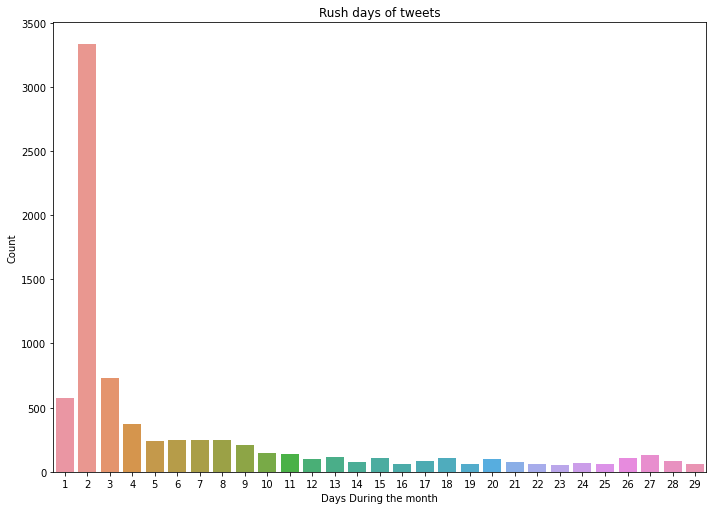

In [44]:
fltrd_F = F[F['tweet_month']== 'February'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_F['tweet_date'].dt.day, data = F)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Feb. has only (2,3).

In [45]:
tt = F.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'time', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

KeyError: 'time'

In [286]:
freq_usrs_feb = F.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_feb.shape[0]))
freq_usrs_feb

no. of all frequent users: 14847


,user.id_str,id_count
0,746703,1
1,755539,1
2,756302,1
3,756674,1
4,759137,2
...,...,...
14842,1233885419940536321,5
14843,1233888207680475137,1
14844,1233892129681879040,1
14845,1233897767065575427,4


In [287]:
freq_fresh_usrs_feb = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_feb.shape[0]))
freq_fresh_usrs_feb

no. of frequent fresh users (2020) : 2308


,user.id_str,id_count
0,1223397193136181249,1
1,1223397252166815745,2
2,1223401807843557378,5
3,1223404362556375041,1
4,1223408792089563136,3
...,...,...
2303,1233885419940536321,5
2304,1233888207680475137,1
2305,1233892129681879040,1
2306,1233897767065575427,4


In [288]:
freq_feb_usrs = set(list(freq_fresh_usrs_feb["user.id_str"]))
len(freq_feb_usrs)

2308

In [289]:
freq_feb_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_feb_usrs)]
print('How often did those users created in august tweeted after that in 2020?')
freq_feb_usrs_all_data['tweet_month'].value_counts()

How often did those users created in august tweeted after that in 2020?


November     3480
December     1640
February     1398
July          989
March         460
April         375
May           317
August        314
October       274
June          237
September     180
Name: tweet_month, dtype: int64

### The same here (44727 tweets) .. only (14847 users)
#### no. of tweet from fresh users in same day: 720
#### Total no. of tweet from 2020 users: 9664
#### no. of frequent fresh users (2020) : 2308
#### no. of all frequent users: 14847

### April ...

In [46]:
G = clean_df[clean_df['usr_month']== 'April'].sort_values(["days"], ascending=True)
print(G.shape[0])
G

54004


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
134209,1247542630147334145,Johnny Depp says ex-wife Amber Heard sliced hi...,1247432187684634625,NewsCrucial,News Crucial,0,07:18:32,2020-04-07,15:11:55,2020-04-07,07:53:23,2020,April,2020,April
136633,1249554911769120768,Abusadora y mentirosa #AmberHeardIsAnAbuser,1249550987586605057,Flor29487004,Flor,0,00:15:25,2020-04-13,04:28:01,2020-04-13,04:12:36,2020,April,2020,April
140993,1255816736764579840,Who else feels bad for Jason Momoa needing to ...,1255805415188844544,privacc1231,privacc123,0,00:44:51,2020-04-30,11:10:16,2020-04-30,10:25:25,2020,April,2020,April
131002,1251540499833315329,Johnny Depp joins Instagram and hints at Amber...,1251531367592017920,GrunderDeborah,Deborah Grunder,0,00:35:02,2020-04-18,15:58:02,2020-04-18,15:23:00,2020,April,2020,April
134687,1247583390720823296,@elonmusk Is it true that you fucked Amber Heard?,1247582880554987525,JedForrest3,Jed Forrest,0,00:01:48,2020-04-07,17:53:53,2020-04-07,17:52:05,2020,April,2020,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592037,1340614142323871744,Is there a way to customize ads on Hulu? I hav...,5526232,nosinbk,Lisa,4986,22:29:08,2020-12-20,11:04:53,2007-04-26,12:35:45,2020,December,2007,April
573050,1336843403137601538,Reminder that it is not only possible but very...,4624361,littlereview,The Little Review,4988,07:04:29,2020-12-10,01:21:19,2007-04-14,18:16:50,2020,December,2007,April
562573,1342859814666346497,@NABenFranklin @kuhan You act like a Pitbull c...,5538252,JustinRYoung,Justin Robert Young,4992,18:46:32,2020-12-26,15:48:23,2007-04-26,21:01:51,2020,December,2007,April
588130,1337497391017160708,Very Amber Heard Johnny Depp vibes,4147471,babiejenks,Jenka,4993,11:37:49,2020-12-11,20:40:02,2007-04-11,09:02:13,2020,December,2007,April


In [312]:
clean_df[clean_df['usr_month'] == 'April']['user.id_str'].value_counts()

276394494              4023
987240830351151104     2654
850021019201011713      913
717763291477581824      908
33250897                737
                       ... 
33929627                  1
849424659456163840        1
1121681447167778816       1
718468605160136704        1
716793598373572609        1
Name: user.id_str, Length: 16674, dtype: int64

In [313]:
print('Fresh users in 2020 are most tweeted on Apr.')
G['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Apr.


2020    8889
2011    8060
2009    6136
2018    5156
2019    4625
2012    3480
2017    3338
2010    3036
2014    2979
2015    2916
2016    2816
2013    2214
2008     295
2007      64
Name: usr_year, dtype: int64

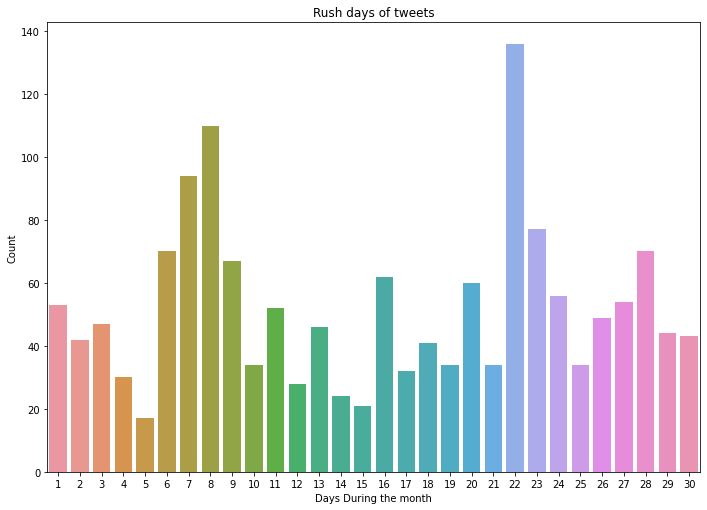

In [62]:
fltrd_G = G[G['tweet_month']== 'April'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_G['tweet_date'].dt.day, data = G)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Apr. the most trendy (20:24, peak in 21), and others in (6, 7, 8, 9, 11, 16).

In [47]:
tt = G.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 64
no. of tweet from 2020 users: 8889


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
52462,1253675003553345539,April,2020,"@DebnamFabray You. , stop posting these staff ...",0,00:13:24,2020-04-24,April,1
49439,1252126489375637505,April,2020,"If I was Johnny Depp, I’d let Amber Heard abus...",0,00:09:34,2020-04-20,April,1
46703,1247582814356164608,April,2020,DC Entertainment: Remove Amber Heard from Aqua...,0,00:56:27,2020-04-07,April,1
46920,1248170401131307011,April,2020,Reminder thar amber heard is an evil person an...,0,00:54:48,2020-04-09,April,1
46919,1248170401131307011,April,2020,Not if you’re amber heard,0,23:14:11,2020-04-10,April,1
...,...,...,...,...,...,...,...,...,...
45558,1245768548741414915,December,2020,@GlenOrantes #JusticeForJohnnyDepp,271,02:09:27,2020-12-29,April,1
45666,1245906613468368896,December,2020,@justiceforamber Amber Heard is an abuser,271,13:21:06,2020-12-30,April,1
45665,1245906613468368896,December,2020,@IvanaE #AmberHeardIsAnAbuser #AmberHeardisAGo...,271,13:02:53,2020-12-30,April,1
45664,1245906613468368896,December,2020,@IvanaE #AmberHeardIsAnAbuser #AmberHeardisAG...,271,12:59:24,2020-12-30,April,1


In [315]:
freq_usrs_apr = G.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_apr.shape[0]))
freq_usrs_apr

no. of all frequent users: 16674


,user.id_str,id_count
0,3103261,1
1,3103641,1
2,3108351,1
3,3223771,1
4,3249861,1
...,...,...
16669,1255973836715106311,1
16670,1255985841568124930,1
16671,1255988219201515521,1
16672,1255994716027523076,4


In [280]:
freq_fresh_usrs_apr = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_apr.shape[0]))
freq_fresh_usrs_apr

no. of frequent fresh users (2020) : 2575


,user.id_str,id_count
0,1245141894851629056,1
1,1245148635316260865,1
2,1245152800964829187,1
3,1245157924437143555,2
4,1245168290068127750,1
...,...,...
2570,1255973836715106311,1
2571,1255985841568124930,1
2572,1255988219201515521,1
2573,1255994716027523076,4


In [281]:
freq_apr_usrs = set(list(freq_fresh_usrs_apr["user.id_str"]))
len(freq_apr_usrs)

2575

In [282]:
freq_apr_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_apr_usrs)]
print('How often did those users created in april tweeted after that in 2020?')
freq_apr_usrs_all_data['tweet_month'].value_counts()

How often did those users created in april tweeted after that in 2020?


November     4784
July         1458
December     1130
August        313
May           294
June          293
April         237
October       216
September     164
Name: tweet_month, dtype: int64

### The same here (54004 tweets) .. only (16674 users)
#### no. of tweet from fresh users in same day: 64
#### Total no. of tweet from 2020 users: 8889
#### no. of frequent fresh users (2020) : 2575
#### no. of all frequent users: 16674

# March ...

In [48]:
x = clean_df[clean_df['usr_month']== 'March'].sort_values(["days"], ascending=True)
print(x.shape[0])
x

49879


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
124560,1244423059924291584,Johnny Depp reveals ex wife Amber Heard cheate...,1244079578433363974,ihtasha20927404,ihtasham,0,22:44:22,2020-03-30,00:35:52,2020-03-29,01:51:30,2020,March,2020,March
115650,1240462459057500160,"!No, this is not a Johnny Depp &amp; Amber Hea...",1240453155445329922,ForMySanity2,For My Mental Health,0,00:36:38,2020-03-19,02:17:51,2020-03-19,01:41:13,2020,March,2020,March
116035,1240781978435108864,While we are all on #QuarentineLife here is a ...,1240421845704142848,DLester36569529,DLester,0,23:50:53,2020-03-19,23:27:30,2020-03-18,23:36:37,2020,March,2020,March
116073,1240694267762200578,@LisaHel75512897 @Oprah Amber Heard?,1240384356637716482,Kinstugi_,Superbonobo Tiger-monkey,0,20:31:21,2020-03-19,17:38:59,2020-03-18,21:07:38,2020,March,2020,March
118198,1242444333829238795,#JusticeForJohnnyDepp #WeAreWithYouJohnnyDepp ...,1242385360577069057,Olga36695315,Olga Deppheads Russia,0,03:54:15,2020-03-24,13:33:07,2020-03-24,09:38:52,2020,March,2020,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315681,1327333190789337088,"Despite What You May Have Heard, Amber Heard i...",821193,slashfilm,Peter Sciretta,4999,12:03:35,2020-11-13,19:31:07,2007-03-08,07:27:32,2020,November,2007,March
546147,1336780753158418433,Johnny Depp habría intentado que Warner Bros r...,2993031,mouse_cl,Mouse,5003,04:06:11,2020-12-09,21:12:22,2007-03-30,17:06:11,2020,December,2007,March
413324,1328812755529424906,#JusticeForJohnnyDepp,810164,EmLah,Emily HK 💙,5007,08:47:55,2020-11-17,21:30:23,2007-03-04,12:42:28,2020,November,2007,March
609589,1338548583197335553,Amber Heard is 'super excited' for 'Zack Snyde...,1332121,getFANDOM,Fandom,5021,14:48:10,2020-12-14,18:17:05,2007-03-17,03:28:55,2020,December,2007,March


In [268]:
clean_df[clean_df['usr_month'] == 'March']['user.id_str'].value_counts()

25461610               1525
1243930694289633280    1077
22664457                919
1245071277339140099     802
264933591               658
                       ... 
974330242536939520        1
1296443485                1
272706089                 1
25506346                  1
25372667                  1
Name: user.id_str, Length: 16782, dtype: int64

In [269]:
print('Fresh users in 2020 are most tweeted on Mar.')
x['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Mar.


2009    8898
2020    8789
2019    6169
2017    3912
2011    3716
2010    2954
2016    2934
2014    2706
2013    2516
2018    2473
2012    2285
2015    2109
2008     219
2007     199
Name: usr_year, dtype: int64

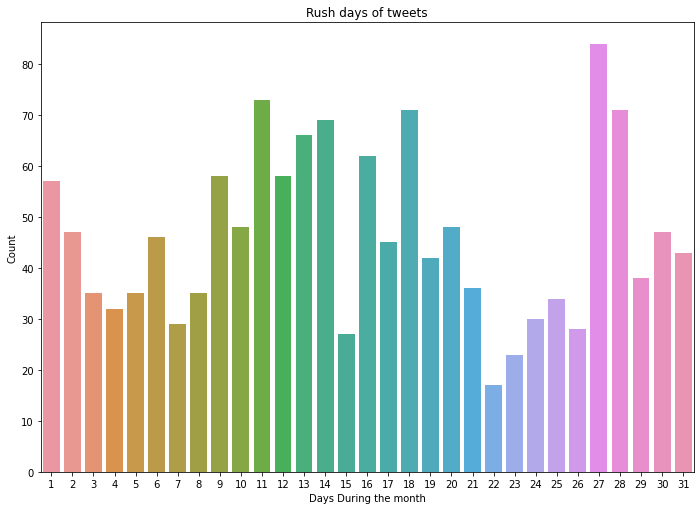

In [64]:
fltrd_x = x[x['tweet_month']== 'March'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_x['tweet_date'].dt.day, data = x)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Mar. alot of trendy days specially (1, 10, 11, 13, 16, 19, 27, 28).

In [49]:
tt = x.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 54
no. of tweet from 2020 users: 8789


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
46601,1243528609593274368,March,2020,Amber Heard loses bid to get $50 million defam...,0,08:00:22,2020-03-27,March,1
47094,1243921769209008129,March,2020,#JusticeForJohnnyDepp \nWe're here for you joh...,0,00:06:28,2020-03-28,March,1
46290,1243013074753331201,March,2020,#JusticeForJohnnyDepp,0,00:10:22,2020-03-26,March,1
45688,1242070640322129928,March,2020,Amber Heard https://t.co/hkObFfUqQs,0,02:09:49,2020-03-23,March,1
44214,1239688184264622082,March,2020,المفروض ان amber heard ده لذيذة وبتعمل كده في ...,0,19:11:47,2020-03-17,March,1
...,...,...,...,...,...,...,...,...,...
41342,1234282486655569921,December,2020,Yall she’s defending Amber Heard and doesn’t k...,302,02:13:57,2020-12-29,March,1
41333,1234282486655569921,December,2020,If you haven’t already give this thread a read...,304,14:46:16,2020-12-31,March,1
41336,1234282486655569921,December,2020,Respect to the guy next to me that shouted thi...,304,02:22:26,2020-12-31,March,1
41338,1234282486655569921,December,2020,The fact iO just deleted 1000+ Instagram pictu...,304,17:32:59,2020-12-31,March,1


In [271]:
freq_usrs_mar = x.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_mar.shape[0]))
freq_usrs_mar

no. of all frequent users: 16782


,user.id_str,id_count
0,804240,1
1,807095,1
2,809334,1
3,810164,1
4,811565,1
...,...,...
16777,1245133396415676416,1
16778,1245134262296367104,1
16779,1245134720347836418,2
16780,1245135947093721089,1


In [272]:
freq_fresh_usrs_mar = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_mar.shape[0]))
freq_fresh_usrs_mar

no. of frequent fresh users (2020) : 2279


,user.id_str,id_count
0,1233915718808330242,1
1,1233916094789963777,1
2,1233918802326368261,42
3,1233920790183239681,1
4,1233927706930286595,2
...,...,...
2274,1245133396415676416,1
2275,1245134262296367104,1
2276,1245134720347836418,2
2277,1245135947093721089,1


In [273]:
freq_mar_usrs = set(list(freq_fresh_usrs_mar["user.id_str"]))
len(freq_mar_usrs)

2279

In [274]:
freq_mar_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_mar_usrs)]
print('How often did those users created in march tweeted after that in 2020?')
freq_mar_usrs_all_data['tweet_month'].value_counts()

How often did those users created in march tweeted after that in 2020?


November     3845
July         1372
December     1174
May           664
April         440
June          398
August        340
October       264
September     161
March         131
Name: tweet_month, dtype: int64

### The same here (49879 tweets) .. only (16782 users)
#### no. of tweet from fresh users in same day: 54
#### Total no. of tweet from 2020 users: 8789
#### no. of frequent fresh users (2020) : 2279
#### no. of all frequent users: 16782

# January ...

In [50]:
q = clean_df[clean_df['usr_month']== 'January'].sort_values(["days"], ascending=True)
print(q.shape[0])
q

48776


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
269,1215992040615530501,Petitions To Getting Amber Heard Removed From ...,1215981952387440642,fandom456732201,DCU TV,0,00:39:42,2020-01-11,13:41:09,2020-01-11,13:01:27,2020,January,2020,January
52609,1223679549952708609,je savais que tout ça c’était la faute de la l...,1223373363223187456,sampharaon,sam,0,20:16:31,2020-02-01,18:48:34,2020-01-31,22:32:03,2020,February,2020,January
881,1212777001217482752,"Could it be possible, that this man (that the ...",1212775646604091393,EJR66747016,EJR,0,00:05:12,2020-01-02,16:45:44,2020-01-02,16:40:32,2020,January,2020,January
882,1212776544273391616,"#JohnnyDepp - a respected screen icon, beloved...",1212775646604091393,EJR66747016,EJR,0,00:03:23,2020-01-02,16:43:55,2020-01-02,16:40:32,2020,January,2020,January
52760,1223488912280059904,#JusticeForJohnnyDepp,1223302936245104640,AlexCong12,Alex Cong,0,12:18:50,2020-02-01,06:11:02,2020-01-31,17:52:12,2020,February,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184513,1286636369259962370,Johnny Depp's lawyers say they have a video th...,612473,BBCNews,BBC News (UK),4946,04:10:32,2020-07-24,12:16:29,2007-01-08,08:05:57,2020,July,2007,January
205721,1288141258830024705,“It has been incredibly painful to relive the ...,612473,BBCNews,BBC News (UK),4950,07:50:26,2020-07-28,15:56:23,2007-01-08,08:05:57,2020,July,2007,January
473104,1326996855100755971,DC Entertainment: Remove Amber Heard from Aqua...,703443,SarahAnne,Sanny,5040,00:47:05,2020-11-12,21:14:39,2007-01-25,20:27:34,2020,November,2007,January
289137,1318908235311583232,@joannekehoe Absolutely Mantzoukas. Momoa is o...,431533,Kate_Welsh,Kate W.,5041,09:07:36,2020-10-21,13:33:22,2007-01-02,04:25:46,2020,October,2007,January


In [72]:
clean_df[clean_df['usr_month'] == 'January']['user.id_str'].value_counts()

4820442413             1528
825318928725467136     1004
953077628059226113      898
815993795057741829      841
2289779038              688
                       ... 
1086932060630061057       1
109623165                 1
1103912832                1
2993952649                1
1212981185615253504       1
Name: user.id_str, Length: 17055, dtype: int64

In [73]:
print('Fresh users in 2020 are most tweeted on Jan.')
q['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Jan.


2020    8622
2019    5796
2017    5378
2016    4050
2014    3864
2012    3731
2018    3606
2011    3321
2013    3217
2010    2809
2015    2396
2009    1837
2008     119
2007      30
Name: usr_year, dtype: int64

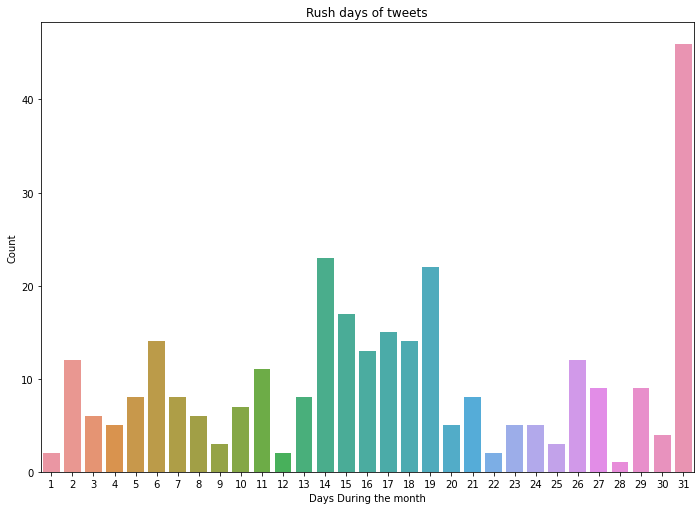

In [74]:
fltrd_q = q[q['tweet_month']== 'January'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_q['tweet_date'].dt.day, data = q)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> Jan. a verry susbicious insight in day 31 must has some event.

In [51]:
tt = q.groupby(['user.id_str','tweet_month','usr_year','user_create_date', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 62
no. of tweet from 2020 users: 8622


,user.id_str,tweet_month,usr_year,user_create_date,full_text,days,hours,tweet_date,usr_month,user_id_count
43129,1215667555194605569,January,2020,2020-01-10,"Amber Heard: The Bikini, The Boot, And The Boa...",0,00:02:48,2020-01-10,January,1
48750,1223364285205753856,February,2020,2020-01-31,On rigolait sur Quinn la folle dingue dans You...,0,16:14:55,2020-02-01,January,1
43261,1215981952387440642,January,2020,2020-01-11,Petitions To Getting Amber Heard Removed From ...,0,00:39:42,2020-01-11,January,1
48712,1223302936245104640,February,2020,2020-01-31,#JusticeForJohnnyDepp,0,12:18:50,2020-02-01,January,1
40562,1212775646604091393,January,2020,2020-01-02,"#JohnnyDepp - a respected screen icon, beloved...",0,00:03:23,2020-01-02,January,1
...,...,...,...,...,...,...,...,...,...,...
40497,1212706042724749312,December,2020,2020-01-02,Searched which #JohnnyDepp films are on @Netf...,362,02:45:08,2020-12-29,January,1
40662,1212955946558689281,December,2020,2020-01-03,#JusticeForJohnnyDepp,362,20:05:06,2020-12-31,January,1
40782,1213179594238382080,December,2020,2020-01-03,eu nao to entendendo essa tag #JusticeForJohnn...,362,04:51:32,2020-12-31,January,1
40575,1212793299863388160,December,2020,2020-01-02,essa amber heard é um lixo mesmo hein q pouca ...,363,06:36:43,2020-12-31,January,1


In [76]:
freq_usrs_jan = q.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_jan.shape[0]))
freq_usrs_jan

no. of all frequent users: 17055


,user.id_str,id_count
0,428333,1
1,431533,1
2,612473,12
3,636743,1
4,654203,12
...,...,...
17050,1223380912110555141,1
17051,1223381402176983040,1
17052,1223382696333905920,1
17053,1223388780897488904,1


In [77]:
freq_fresh_usrs_jan = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_jan.shape[0]))
freq_fresh_usrs_jan

no. of frequent fresh users (2020) : 3347


,user.id_str,id_count
0,1212162735430987776,1
1,1212165917372628993,1
2,1212169453690970112,1
3,1212172765475688448,1
4,1212172872048709632,1
...,...,...
3342,1223380912110555141,1
3343,1223381402176983040,1
3344,1223382696333905920,1
3345,1223388780897488904,1


In [78]:
freq_jan_usrs = set(list(freq_fresh_usrs_jan["user.id_str"]))
len(freq_jan_usrs)

3347

In [79]:
freq_jan_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_jan_usrs)]
print('How often did those users created in january tweeted after that in 2020?')
freq_jan_usrs_all_data['tweet_month'].value_counts()

How often did those users created in january tweeted after that in 2020?


November     2502
February     2340
July         1401
December      715
March         324
August        292
April         242
May           223
October       189
June          183
September     168
January        43
Name: tweet_month, dtype: int64

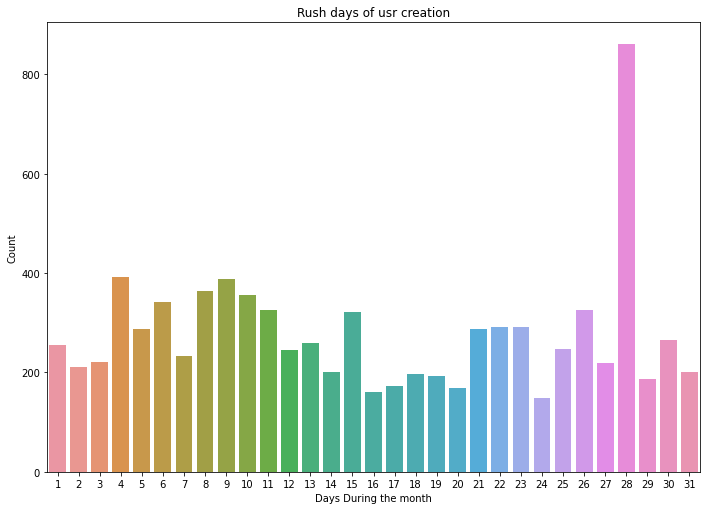

In [81]:
fltrd_usr = tt[tt['usr_month']== 'January'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_usr['user_create_date'].dt.day, data = freq_jan_usrs_all_data)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of usr creation')
plt.show();

> Most of the new users in jan were created in 28 which is susbicious. appeared in certain months than others.

### The same here (48776 tweets) .. only (17055 users)
#### no. of tweet from fresh users in same day: 62
#### Total no. of tweet from 2020 users: 8622
#### no. of frequent fresh users (2020) : 3347
#### no. of all frequent users: 17055

### June ... 

In [52]:
y = clean_df[clean_df['usr_month']== 'June'].sort_values(["days"], ascending=True)
print(y.shape[0])
y

52317


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
167198,1277317154732294145,@realamberheard @ACLU @FlyFrontier @nytopinion...,1277268701755006978,tinyhobbit196,Tiny Hobbit,0,03:10:15,2020-06-28,19:05:15,2020-06-28,15:55:00,2020,June,2020,June
157204,1271870938049437696,L'Oréal: Remove Amber Heard as L'Oreal Spokesp...,1271790500865929217,Julie02942059,Julie,0,05:18:50,2020-06-13,18:23:56,2020-06-13,13:05:06,2020,June,2020,June
167193,1277318110794485760,Check out https://t.co/vAWcPGJkFD\n#meet_amber...,1277268701755006978,tinyhobbit196,Tiny Hobbit,0,03:14:03,2020-06-28,19:09:03,2020-06-28,15:55:00,2020,June,2020,June
168478,1271441727673577473,«DC Entertainment: Remove Amber Heard from Aqu...,1271357355486314496,Roni35149697,Roni,0,05:35:05,2020-06-12,13:58:24,2020-06-12,08:23:19,2020,June,2020,June
161820,1267732963187458048,Ejem...ejem... Amber Heard\nNunca hay que gene...,1267730605908860928,IamNobody_18,Another Shy Person,0,00:09:05,2020-06-02,08:21:06,2020-06-02,08:12:01,2020,June,2020,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314827,1327069493093412864,Bonita recompensa a Amber Heard volver con su ...,6580012,AdanElDiez,Adan el ➐,4910,04:35:47,2020-11-13,02:03:17,2007-06-04,21:27:30,2020,November,2007,June
314813,1327069922804064258,"Bueno ya en Piratas del Caribe sobraba, pero l...",6580012,AdanElDiez,Adan el ➐,4910,04:37:30,2020-11-13,02:05:00,2007-06-04,21:27:30,2020,November,2007,June
545726,1336719755877646338,"@XaiaX ""man amber heard really said some shitt...",7125992,aegies,Arthur Gies (he/him),4913,11:18:21,2020-12-09,17:09:59,2007-06-28,05:51:38,2020,December,2007,June
561096,1336716543393075200,lotta people on my timeline/follow list that h...,7125992,aegies,Arthur Gies (he/him),4913,11:05:35,2020-12-09,16:57:13,2007-06-28,05:51:38,2020,December,2007,June


In [317]:
clean_df[clean_df['usr_month'] == 'June']['user.id_str'].value_counts()

3309371255             1944
604646149              1181
745798442199351296     1089
1135632615359340544     871
3344705200              844
                       ... 
1268909820305956865       1
1494688104                1
1270493194275491845       1
1136845533434089472       1
615790775                 1
Name: user.id_str, Length: 17516, dtype: int64

In [253]:
print('Fresh users in 2020 are most tweeted on jun.')
y['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on jun.


2020    8412
2019    5978
2009    5335
2015    5296
2012    4174
2018    3703
2016    3694
2017    3288
2010    3241
2011    3198
2013    2933
2014    2280
2008     747
2007      38
Name: usr_year, dtype: int64

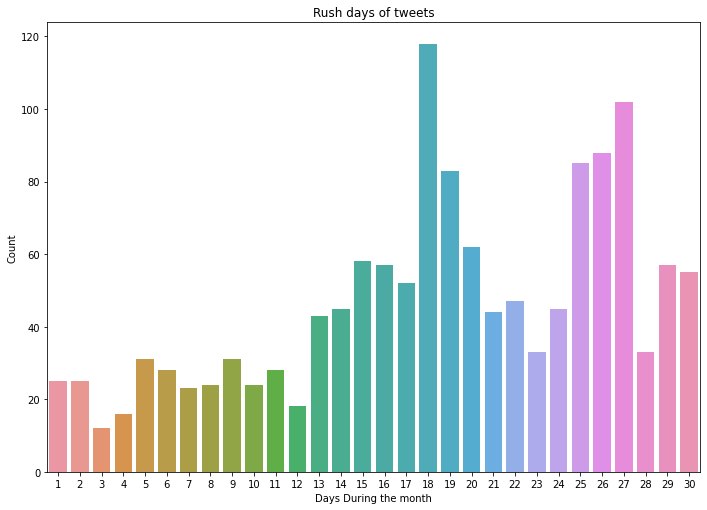

In [68]:
fltrd_y = y[y['tweet_month']== 'June'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_y['tweet_date'].dt.day, data = y)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> June trendy days from (13:30)

In [53]:
tt = y.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 60
no. of tweet from 2020 users: 8412


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
47361,1272034016233836544,June,2020,"@Thebuttsmarn hey big fella, just wondering if...",0,21:26:32,2020-06-15,June,1
49466,1274713162919673856,June,2020,It wasn't her fault. Amber was defending herse...,0,00:10:26,2020-06-21,June,1
49467,1274713162919673856,June,2020,Loads of fans and people around the world want...,0,04:13:36,2020-06-21,June,1
49468,1274713162919673856,June,2020,Please support Amber Heard for Aquaman 2. Ambe...,0,04:02:11,2020-06-21,June,1
50841,1276778411340427266,June,2020,@DjKasBaby Amber Heard as a prisoner for false...,0,00:18:56,2020-06-27,June,1
...,...,...,...,...,...,...,...,...,...
44387,1267582581517795329,December,2020,Amber Heard,211,01:15:13,2020-12-29,June,1
43984,1267296328091963393,December,2020,@suamihansohee Atau JGL involve sebagai direct...,211,04:43:49,2020-12-29,June,1
43985,1267296328091963393,December,2020,"@suamihansohee Tapi bang, rumornya malah JGL j...",211,04:27:45,2020-12-29,June,1
44376,1267576989247995909,December,2020,#JusticeForJohnnyDepp,212,01:08:47,2020-12-30,June,1


In [255]:
freq_usrs_jun = y.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_jun.shape[0]))
freq_usrs_jun

no. of all frequent users: 17516


,user.id_str,id_count
0,6509832,5
1,6521702,1
2,6527832,1
3,6529922,1
4,6580012,2
...,...,...
17511,1278082352896528384,1
17512,1278085303203397641,3
17513,1278105208049020930,1
17514,1278106057097838593,1


In [256]:
freq_fresh_usrs_jun = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_jun.shape[0]))
freq_fresh_usrs_jun

no. of frequent fresh users (2020) : 2922


,user.id_str,id_count
0,1267245844996280320,1
1,1267247132928425985,1
2,1267247849345073165,10
3,1267248593406251008,1
4,1267249608922664967,1
...,...,...
2917,1278082352896528384,1
2918,1278085303203397641,3
2919,1278105208049020930,1
2920,1278106057097838593,1


In [257]:
freq_jun_usrs = set(list(freq_fresh_usrs_jun["user.id_str"]))
len(freq_jun_usrs)

2922

In [258]:
freq_jun_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_jun_usrs)]
print('How often did those users created in june tweeted after that in 2020?')
freq_jun_usrs_all_data['tweet_month'].value_counts()

How often did those users created in june tweeted after that in 2020?


November     4307
July         1615
December     1306
August        409
October       275
June          256
September     244
Name: tweet_month, dtype: int64

### The same here (52317 tweets) .. only (17516 users)
#### no. of tweet from fresh users in same day: 60
#### Total no. of tweet from 2020 users: 8412
#### no. of frequent fresh users (2020) : 2922
#### no. of all frequent users: 17516

###  September ...

In [54]:
H = clean_df[clean_df['usr_month']== 'September'].sort_values(["days"], ascending=True)
print(H.shape[0])
H

43455


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
278939,1303728571437838336,#AmberHeardIsAnAbuser #boycottamberheard,1303725550318493697,Jacquette1920,Jacquette,0,00:11:49,2020-09-09,16:14:48,2020-09-09,16:02:59,2020,September,2020,September
282298,1306719895502098432,#johnnydepp #JusticeForJohnnyDepp #amberheardi...,1306409729204400128,johnnydepp_guy,Johnny Depp's Guy,0,20:32:11,2020-09-17,22:21:15,2020-09-17,01:49:04,2020,September,2020,September
282163,1306397127950696448,@DCComics if amber heard is in aqua man 2 I wi...,1306396307087650816,Just_sarah_420,JuStSaRaH,0,00:03:04,2020-09-17,00:58:41,2020-09-17,00:55:37,2020,September,2020,September
271960,1303045109383135233,#BDNA \n\n¿Bajo qué cargos? Amber Heard vuelve...,1303007341479178241,EttoZone,Lyn On Mars,0,02:29:52,2020-09-07,18:58:58,2020-09-07,16:29:06,2020,September,2020,September
273932,1302314992520237057,@edenxjune @Rahulstwitta an abusive manipulati...,1302148437006143493,OzSyndicalist,Dave's Dinnerz,0,11:00:59,2020-09-05,18:37:44,2020-09-05,07:36:45,2020,September,2020,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501983,1325017971807444992,Brief digression from #EndSARS content: Amber ...,8919482,razorsmile,edumurphy,4800,12:13:04,2020-11-07,10:11:16,2007-09-16,21:58:12,2020,November,2007,September
446492,1328090722394902529,can someone who is better at paying attention ...,9054672,popdoggess,pop goddess athena,4802,03:39:26,2020-11-15,21:41:17,2007-09-23,18:01:51,2020,November,2007,September
344367,1333378700184854531,"Emily Ratajkowski mostró su embarazo, Amber He...",8974082,teleshowcom,TeleShow,4820,22:09:14,2020-11-30,11:53:49,2007-09-19,13:44:35,2020,November,2007,September
345244,1333533059782762497,#CelebritiesEnUnClick Emily Ratajkowski mostró...,8974082,teleshowcom,TeleShow,4821,08:22:36,2020-11-30,22:07:11,2007-09-19,13:44:35,2020,November,2007,September


In [240]:
clean_df[clean_df['usr_month'] == 'September']['user.id_str'].value_counts()

1168423251334193152    1058
1302912993882238977     706
1172706853048004609     672
775355256410701824      520
1041766942351212546     488
                       ... 
192618178                 1
1178767243817168903       1
1305958843340533761       1
1171888924995796994       1
1174943854035755008       1
Name: user.id_str, Length: 15633, dtype: int64

In [241]:
print('Fresh users in 2020 are most tweeted on Aug.')
H['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Aug.


2020    7809
2019    6872
2018    4460
2012    3406
2015    3259
2013    3052
2009    2860
2017    2460
2016    2427
2011    2232
2010    2167
2014    1920
2008     456
2007      75
Name: usr_year, dtype: int64

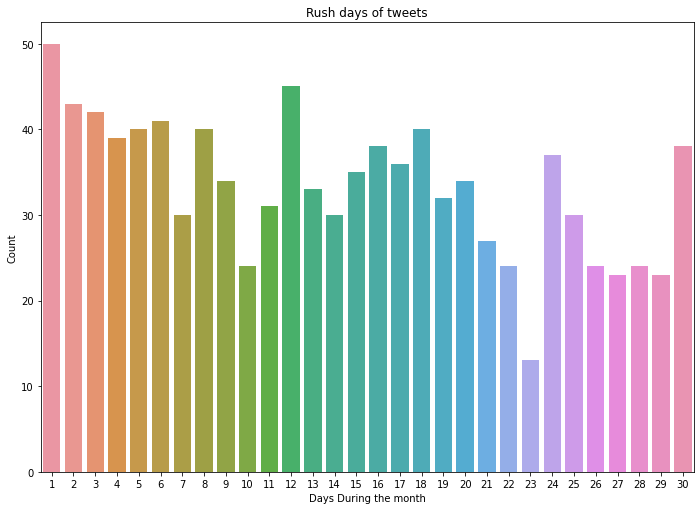

In [71]:
fltrd_H = H[H['tweet_month']== 'September'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_H['tweet_date'].dt.day, data = H)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In this month alot of trendy days

In [55]:
tt = H.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 56
no. of tweet from 2020 users: 7809


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
42566,1310562363607789571,September,2020,@adam_waldman #FreeBritney #JusticeForJohnnyDe...,0,08:21:01,2020-09-28,September,1
35708,1300747603538325514,September,2020,"Like millions of others, I believed Amber Hear...",0,01:21:07,2020-09-01,September,1
43355,1311303740243099648,September,2020,cw // amber heard\n\ncan amber heard just shut...,0,08:58:44,2020-09-30,September,1
43351,1311283988556726272,October,2020,#AmberHeardIsAnAbuser,0,16:23:55,2020-10-01,September,1
39085,1305538615175512064,September,2020,Amber Heard https://t.co/0hETywTyGl,0,00:57:51,2020-09-14,September,1
...,...,...,...,...,...,...,...,...,...
36406,1302001355662524417,December,2020,@lorealparis why is she??? \n\n#justiceforjohn...,117,14:46:18,2020-12-31,September,1
36390,1302001355662524417,December,2020,@OneLoveRacing1 #justiceforjohnny says he has ...,117,13:27:01,2020-12-31,September,1
35677,1300747603538325514,December,2020,This influencer I follow just posted this in r...,117,04:14:59,2020-12-27,September,1
35659,1300665295162482688,December,2020,Pessoal subindo a hashtag #JusticeForJohnnyDep...,120,14:27:44,2020-12-30,September,1


In [245]:
freq_usrs_sep = H.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_sep.shape[0]))
freq_usrs_sep

no. of all frequent users: 15633


,user.id_str,id_count
0,8691502,1
1,8720562,7
2,8727232,1
3,8736882,1
4,8802752,1
...,...,...
15628,1311424460583399425,1
15629,1311434258569928704,1
15630,1311447919321645057,1
15631,1311449134038241285,1


In [246]:
freq_fresh_usrs_sep = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_sep.shape[0]))
freq_fresh_usrs_sep

no. of frequent fresh users (2020) : 2167


,user.id_str,id_count
0,1300594340234891265,1
1,1300596112202412034,1
2,1300598065192005633,3
3,1300610121681309698,1
4,1300632056938991616,1
...,...,...
2162,1311424460583399425,1
2163,1311434258569928704,1
2164,1311447919321645057,1
2165,1311449134038241285,1


In [247]:
freq_sep_usrs = set(list(freq_fresh_usrs_sep["user.id_str"]))
len(freq_sep_usrs)

2167

In [248]:
freq_sep_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_sep_usrs)]
print('How often did those users created in September tweeted after that in 2020?')
freq_sep_usrs_all_data['tweet_month'].value_counts()

How often did those users created in September tweeted after that in 2020?


November     5198
December     1871
October       551
September     189
Name: tweet_month, dtype: int64

### The same here (43455 tweets) .. only (15633 users)
#### no. of tweet from fresh users in same day: 56
#### Total no. of tweet from 2020 users: 7809
#### no. of frequent fresh users (2020) : 2167
#### no. of all frequent users: 15633

### December ...

In [56]:
J = clean_df[clean_df['usr_month']== 'December'].sort_values(["days"], ascending=True)
print(J.shape[0])
J

44970


,id_str,full_text,user.id_str,user.screen_name,user.name,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
589403,1340158316291502081,#Deppcember #JusticeForJohnnyDepp #NoJohnnyNoP...,1340150301899317248,Soledad15981419,Soledad,0,00:30:48,2020-12-19,04:53:36,2020-12-19,04:22:48,2020,December,2020,December
589407,1340157405133500416,#Deppcember #JusticeForJohnnyDepp #JohnnyDeppI...,1340150301899317248,Soledad15981419,Soledad,0,00:27:10,2020-12-19,04:49:58,2020-12-19,04:22:48,2020,December,2020,December
589409,1340157021119795205,#Deppcember #JohnnyDeppIsInnocent #JusticeForJ...,1340150301899317248,Soledad15981419,Soledad,0,00:25:39,2020-12-19,04:48:27,2020-12-19,04:22:48,2020,December,2020,December
589480,1340326998971981825,#Deppcember #JohnnyDeppIsInnocent #NoJohnnyNoP...,1340150301899317248,Soledad15981419,Soledad,0,11:41:05,2020-12-19,16:03:53,2020-12-19,04:22:48,2020,December,2020,December
599895,1343551239737499651,We support you Johnny❤💗 #DeppMovieNight \n#Ju...,1343327109746462720,depphead2020,Justice for JD,0,14:44:43,2020-12-28,13:35:52,2020-12-27,22:51:09,2020,December,2020,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91436,1223775917912145920,The Amber Heard news doesn't justify bringing ...,49443,bietz,mike b.,4803,22:00:26,2020-02-02,01:11:30,2006-12-08,03:11:04,2020,February,2006,December
198947,1281681696287608833,Why is @DailyMailUK\nPaying so much attention ...,290883,annief1,Anne,4944,02:39:13,2020-07-10,20:08:23,2006-12-27,17:29:10,2020,July,2006,December
273043,1305875569352024064,"@mistermegative @bynkii Similarly, nerds on 9g...",65463,oscherler,Ölbaum,5024,14:32:59,2020-09-15,14:26:12,2006-12-13,23:53:13,2020,September,2006,December
312481,1327303183933181952,DC Entertainment: Remove Amber Heard from Aqua...,70083,marul69,marul69,5082,06:56:15,2020-11-13,17:31:53,2006-12-15,10:35:38,2020,November,2006,December


In [230]:
clean_df[clean_df['usr_month'] == 'December']['user.id_str'].value_counts()

4583281223             6072
2241916310             1276
1340150301899317248    1186
232377398              1049
1208818373439737856     591
                       ... 
94575817                  1
942453968482877440        1
2258827891                1
1201041530762301441       1
230887422                 1
Name: user.id_str, Length: 14640, dtype: int64

In [231]:
print('Fresh users in 2020 are most tweeted on Aug.')
J['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Aug.


2015    7943
2019    7509
2018    4139
2017    3479
2013    3234
2010    3047
2020    2948
2011    2829
2016    2815
2014    2375
2012    2059
2009    1727
2008     786
2007      72
2006       8
Name: usr_year, dtype: int64

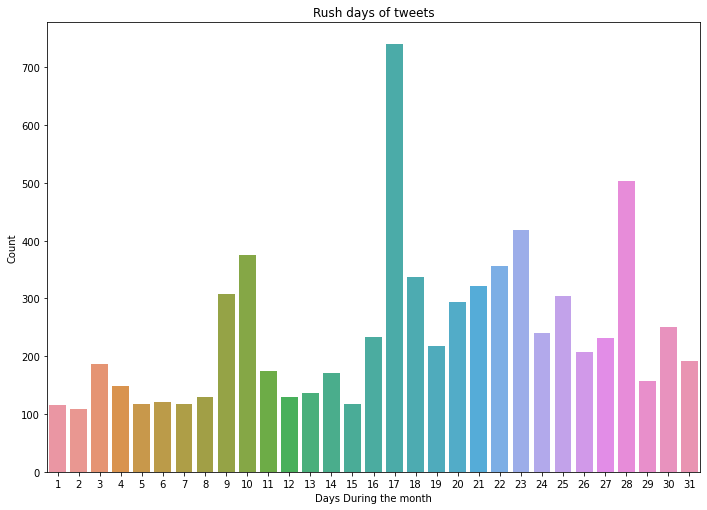

In [73]:
fltrd_J = J[J['tweet_month']== 'December'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_J['tweet_date'].dt.day, data = J)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> Very obvious how the trendy dates here are segnificante specialy in (16:18), (20 : 23), (25:28), (8:11), (30-31) 

In [57]:
tt = J.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2020]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2020 users:', (tt.shape[0]))
tt

no. of tweet in same day: 715
no. of tweet from 2020 users: 2948


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
44969,1344555561413529601,December,2020,#JusticeForJohnnyDepp #AmberHeardIsTheRealAbus...,0,00:04:45,2020-12-31,December,1
43301,1340150301899317248,December,2020,#Deppcember \nQuédate con quién te mire como D...,0,20:59:13,2020-12-20,December,1
44968,1344477353561321474,December,2020,DC Entertainment: Remove Amber Heard from Aqua...,0,00:15:55,2020-12-31,December,1
43809,1340150301899317248,December,2020,#Deppcember #JohnnyDeppIsInnocent #AmberHeardI...,0,11:24:15,2020-12-19,December,1
43828,1340150301899317248,December,2020,#Deppcember #JohnnyDeppIsInnocent #JohnnyDeppI...,0,16:01:03,2020-12-19,December,1
...,...,...,...,...,...,...,...,...,...
42099,1333932260207149057,December,2020,Exactly this\n\nOne of the most important piec...,29,03:13:29,2020-12-31,December,1
42107,1333932260207149057,December,2020,"I'm not a doctor or a medical professional, ho...",29,03:28:55,2020-12-31,December,1
42114,1333933437321932801,December,2020,@Asbal_ @loveispeace9 Dicen que es mi cuerpo y...,29,20:55:20,2020-12-31,December,1
42080,1333780442508451848,December,2020,@Smartiepants73 @netflix Wow. This is hideous....,30,01:21:56,2020-12-31,December,1


In [236]:
freq_usrs_dec = J.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_dec.shape[0]))
freq_usrs_dec

no. of all frequent users: 14640


,user.id_str,id_count
0,49443,1
1,53053,1
2,65463,1
3,66003,1
4,69053,1
...,...,...
14635,1344340304715984896,1
14636,1344403314583216128,4
14637,1344431120558010371,1
14638,1344477353561321474,1


In [249]:
freq_fresh_usrs_dec = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2020) :', (freq_fresh_usrs_dec.shape[0]))
freq_fresh_usrs_dec

no. of frequent fresh users (2020) : 2167


,user.id_str,id_count
0,1300594340234891265,1
1,1300596112202412034,1
2,1300598065192005633,3
3,1300610121681309698,1
4,1300632056938991616,1
...,...,...
2162,1311424460583399425,1
2163,1311434258569928704,1
2164,1311447919321645057,1
2165,1311449134038241285,1


In [250]:
freq_dec_usrs = set(list(freq_fresh_usrs_dec["user.id_str"]))
len(freq_dec_usrs)

2167

In [251]:
freq_aug_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_aug_usrs)]
print('How often did those users created in august tweeted after that in 2020?')
freq_aug_usrs_all_data['tweet_month'].value_counts()

How often did those users created in august tweeted after that in 2020?


November     8312
December     3764
October      1002
August        853
September     807
Name: tweet_month, dtype: int64

### The same here (44970 tweets) .. only (14640 users)
#### no. of tweet from fresh users in same day: 715
#### Total no. of tweet from 2020 users: 2948
#### no. of frequent fresh users (2020) : 2167
#### no. of all frequent users: 14640

In [43]:
z.to_csv("top_usrs_2020/all_usrs_2020.csv", index=False)

## The sorting according to days diff. between usr creation and tweet is wierd many usrs tweeted offenssively after their account creation with less than 3 hrs!

> Some dates have the most of tweets which made them trendy must have some events before or after them.

> Percentage between fresh created users and their tweets in the same dday is wierd.

> Percentage of tweets by fresh users in the whole year or each month is also interesting as they always have the higher percentage of tweets within all users.

> In august all fresh accounts had similar user.names and all had supportive names for "Jonny"

> Many tweets are from same user in the same day and also most of them are fresh users